# Big Data Bootcamp Project: Dead or Alive - Titanic Classification

In this notebook you will be using all the different tools and techinques you learned during the bootcamp to create your own project. Here's what you'll be doing:

1. Cleaning the data
2. Conducting exploratory data analysis (EDA)
3. Conduct an A/B Test
4. Split the dataset
5. Create a K-NN classifier

In the end, you will have developed a classifier that can classify passengers as either dead or alive based on various attributes!

In [1]:
# Don't change this cell, just run it.

import numpy as np
from math import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = (10, 5)

## Part 1: Data Cleaning

Although the world is filled with accessible data, not all that data is immediately usable. You'll come to realize that a lot of data you find is very messy and dirty. So before you can start analyzing the data, you will need to do some cleaning.

First let's pull the data:

In [5]:
titanic = pd.read_csv('/content/drive/MyDrive/BDAB-Titanic-Project/titanic_dirtied.csv')
titanic

,passenger age,Cabin,Location Embarked,FARE,Passenger Name,# of parents/children,PassengerId,Passenger Class,Sex,# of siblings/spouses,Survived,Ticket,Title,Family_Size
0,20.0,C14,NaN,NaN,"Pang, Mr. Joseph Guadalupe",NaN,NaN,NaN,MALE,NaN,no,NaN,Mr,NaN
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0.0,1.0,3.0,MALE,1.0,no,A/5 21171,Mr,1.0
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,2.0,1.0,FEMALE,1.0,yes,PC 17599,Mrs,1.0
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0.0,3.0,3.0,FEMALE,0.0,yes,STON/O2. 3101282,Miss,0.0
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,4.0,1.0,FEMALE,1.0,yes,113803,Mrs,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,27.0,NaN,S,13.0000,"Montvila, Rev. Juozas",0.0,887.0,2.0,MALE,0.0,no,211536,Rev,0.0
891,19.0,B42,S,30.0000,"Graham, Miss. Margaret Edith",0.0,888.0,1.0,FEMALE,0.0,yes,112053,Miss,0.0
892,22.0,NaN,S,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",2.0,889.0,3.0,FEMALE,1.0,no,W./C. 6607,Miss,3.0
893,26.0,C148,C,30.0000,"Behr, Mr. Karl Howell",0.0,890.0,1.0,MALE,0.0,yes,111369,Mr,0.0


**Question 1:** If we look at our dataset, we can see that some values are 'nan'. In data science, we call these null values. This means that when the data was entered, these sections were left blank. We want to remove them so that our data is easier to work with.

Complete the `to_str()` function, which is converting 'nan' values to strings so that they are easier to remove.

Note: `np.append()` adds a new element to an array. For example, if `a = make_array(1)`, then to add 2 into the array, you do `a = np.append(a, 2)`.

In [6]:
def to_str(array):
    new_array = np.array([])
    for i in array:
        if (i>0 or i<0 or i==0):
            new_array = np.append(new_array,i)
        else:
            new_array = np.append(new_array,str(i))
    return new_array

In [7]:
# Run this cell to use the to_str function on the necessary columns.
new_Fare = to_str(titanic['FARE'])
new_Class = to_str(titanic['Passenger Class'])
new_Family_Size = to_str(titanic['Family_Size'])

**Question 2:** Add the columns from the previous cell to the original titanic table.



In [8]:
titanic["FARE"] =  new_Fare
titanic["Passenger Class"] = new_Class
titanic['Family_Size'] = new_Family_Size
titanic.head(5)

,passenger age,Cabin,Location Embarked,FARE,Passenger Name,# of parents/children,PassengerId,Passenger Class,Sex,# of siblings/spouses,Survived,Ticket,Title,Family_Size
0,20.0,C14,NaN,nan,"Pang, Mr. Joseph Guadalupe",NaN,NaN,nan,MALE,NaN,no,NaN,Mr,nan
1,22.0,NaN,S,7.25,"Braund, Mr. Owen Harris",0.0,1.0,3.0,MALE,1.0,no,A/5 21171,Mr,1.0
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,2.0,1.0,FEMALE,1.0,yes,PC 17599,Mrs,1.0
3,26.0,NaN,S,7.925,"Heikkinen, Miss. Laina",0.0,3.0,3.0,FEMALE,0.0,yes,STON/O2. 3101282,Miss,0.0
4,35.0,C123,S,53.1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,4.0,1.0,FEMALE,1.0,yes,113803,Mrs,1.0


**Question 3:** Drop the following columns: `Cabin`, `Location Embarked`, `PassengerId`, `Ticket`, `Title`, `# of parents/children`, `# of siblings/spouses`.

In [9]:
titanic = titanic.drop(columns = ['Cabin', 'Location Embarked', 'PassengerId', 'Ticket', 'Title', '# of parents/children', '# of siblings/spouses'], axis = 1)
titanic.head(5)

,passenger age,FARE,Passenger Name,Passenger Class,Sex,Survived,Family_Size
0,20.0,nan,"Pang, Mr. Joseph Guadalupe",nan,MALE,no,nan
1,22.0,7.25,"Braund, Mr. Owen Harris",3.0,MALE,no,1.0
2,38.0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,FEMALE,yes,1.0
3,26.0,7.925,"Heikkinen, Miss. Laina",3.0,FEMALE,yes,0.0
4,35.0,53.1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,FEMALE,yes,1.0


**Question 4:** We want to relabel some of the columns so that their names are easier to work with. Complete the following cell to relabel the columns.

In [10]:
titanic = titanic.rename(columns = {'passenger age': 'Age'})
titanic = titanic.rename(columns = {'FARE': 'Fare'})
titanic = titanic.rename(columns = {'Passenger Name': 'Name'})
titanic = titanic.rename(columns = {'Passenger Class': 'Class'})
titanic = titanic.rename(columns = {'Family_Size': 'Family Size'})
titanic.head(5)

,Age,Fare,Name,Class,Sex,Survived,Family Size
0,20.0,nan,"Pang, Mr. Joseph Guadalupe",nan,MALE,no,nan
1,22.0,7.25,"Braund, Mr. Owen Harris",3.0,MALE,no,1.0
2,38.0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,FEMALE,yes,1.0
3,26.0,7.925,"Heikkinen, Miss. Laina",3.0,FEMALE,yes,0.0
4,35.0,53.1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,FEMALE,yes,1.0


**Question 5:** Now that we have converted the table into something that we can work with, we can finally remove the null values. Complete the code in the following cell to remove null values.

In [11]:
titanic = titanic[(titanic['Fare'] != 'nan')]
titanic.head(5)

,Age,Fare,Name,Class,Sex,Survived,Family Size
1,22.0,7.25,"Braund, Mr. Owen Harris",3.0,MALE,no,1.0
2,38.0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,FEMALE,yes,1.0
3,26.0,7.925,"Heikkinen, Miss. Laina",3.0,FEMALE,yes,0.0
4,35.0,53.1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,FEMALE,yes,1.0
5,35.0,8.05,"Allen, Mr. William Henry",3.0,MALE,no,0.0


**Question 6:** Previously we converted some columns with floats into strings. Now that we have removed null values, we want to turn these columns back into floats. Complete the next cell to create a function `to_float()`that converts an array of values into floats. It should return an array of floats.

In [12]:
def to_float(array):
    new_array = np.array([])
    for i in array:
        new_array = np.append(new_array,float(i))
    return new_array

**Question 7:** Use this new function on each of the following columns: `Fare`, `Class`, and `Family Size`

In [13]:
new_Fare = to_float(titanic['Fare'])
new_Class = to_float(titanic['Class'])
new_Family_size = to_float(titanic['Family Size'])

**Question 8:** Similar to Question 2, replace these three columns with the new arrays created above.

In [14]:
titanic["Fare"] =  new_Fare
titanic["Class"] = new_Class
titanic['Family_Size'] = new_Family_size
titanic.head(5)

,Age,Fare,Name,Class,Sex,Survived,Family Size,Family_Size
1,22.0,7.2500,"Braund, Mr. Owen Harris",3.0,MALE,no,1.0,1.0
2,38.0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,FEMALE,yes,1.0,1.0
3,26.0,7.9250,"Heikkinen, Miss. Laina",3.0,FEMALE,yes,0.0,0.0
4,35.0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,FEMALE,yes,1.0,1.0
5,35.0,8.0500,"Allen, Mr. William Henry",3.0,MALE,no,0.0,0.0


**Question 9:** Change the capitalization of the `Sex` column so that all letters are lowercase.

Hint: What method can you use to apply a function to every item in a column?

In [15]:
sex_lower = titanic["Sex"].apply(np.char.lower)
sex_lower

1        male
2      female
3      female
4      female
5        male
        ...  
890      male
891    female
892    female
893      male
894      male
Name: Sex, Length: 891, dtype: object

In [16]:
titanic["Sex"] = sex_lower
titanic.head(5)

,Age,Fare,Name,Class,Sex,Survived,Family Size,Family_Size
1,22.0,7.2500,"Braund, Mr. Owen Harris",3.0,male,no,1.0,1.0
2,38.0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,female,yes,1.0,1.0
3,26.0,7.9250,"Heikkinen, Miss. Laina",3.0,female,yes,0.0,0.0
4,35.0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,female,yes,1.0,1.0
5,35.0,8.0500,"Allen, Mr. William Henry",3.0,male,no,0.0,0.0


**Question 10:** If we look at the `Survived` column, we can see that all of the items are either 'yes' or 'no'. These strings are difficult to work with, so we want to convert them into numerical values that can easily be compared.

Complete the function `one_zero()` to convert 'yes' values into 1 and 'no' values into 0. This function takes in individual items, not entire columns. It will be applied to the table later on.

In [17]:
def one_zero(x):
    if x == 'yes':
        return 1
    else:
        return 0

**Question 11:** Now you can apply the `one_zero()` function to the `Survived` column. Refer to Questions 2 and 9 if you get stuck.

In [18]:
new_survived = titanic['Survived'].apply(one_zero)
titanic["Survived"] = new_survived
titanic.head(5)

,Age,Fare,Name,Class,Sex,Survived,Family Size,Family_Size
1,22.0,7.2500,"Braund, Mr. Owen Harris",3.0,male,0,1.0,1.0
2,38.0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,female,1,1.0,1.0
3,26.0,7.9250,"Heikkinen, Miss. Laina",3.0,female,1,0.0,0.0
4,35.0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,female,1,1.0,1.0
5,35.0,8.0500,"Allen, Mr. William Henry",3.0,male,0,0.0,0.0


Now the dataset is cleaned and ready to be used!

## Part 2: Exploratory Data Analysis

Now we can start the fun part: Exploratory Data Analysis (EDA)! EDA is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. In other words, EDA is the process of understanding the story behind our data. This is a necessary step since we want to figure out which columns/rows would be important for model creation, what the relationships are between datasets/columns, and finally also figuring out which columns are important, and which aren't.

Now that you know what EDA is, let's begin and get a better understanding of our data!

### General exploration

**Question 12:** Complete the following cell to find the total passengers on the Titanic and the number of passengers that survived.

Hint: To find `num_survived`, think about why we converted the `Survived` column to 1's and 0's.

In [19]:
total_passengers = titanic.shape[0]
num_survived = sum(titanic['Survived'])
print('There were ' + str(total_passengers) + ' passengers on the Titanic, but only ' + str(num_survived) + ' survived.')

There were 891 passengers on the Titanic, but only 342 survived.


**Question 13:** Find the number of male and female passengers on the Titanic.

In [20]:
# Number of males onboard
num_male = titanic[titanic["Sex"]=="male"].shape[0]

# Number of females onboard
num_female = titanic[titanic["Sex"]=="female"].shape[0]

print('There were ' + str(num_male) + ' male passengers, but only ' + str(num_female) + ' female passengers.')

There were 577 male passengers, but only 314 female passengers.


### Descriptive statistics (mean, median, etc.)

**Question 14:** Find the mean fare and age on the Titanic.

In [21]:
mean_fare = np.mean(titanic['Fare'])
mean_age = np.mean(titanic['Age'])
print('The mean fare on the Titanic is ' + str(mean_fare))
print('The mean age on the Titanic is ' + str(mean_age))

The mean fare on the Titanic is 32.204207968574636
The mean age on the Titanic is 29.44519640852974


**Question 15:** Let's round those values so that they are easier to read.

In [22]:
rounded_mean_fare = round(mean_fare)
rounded_mean_age = round(mean_age)
print('The mean fare on the Titanic is ' + str(rounded_mean_fare))
print('The mean age on the Titanic is ' + str(rounded_mean_age))

The mean fare on the Titanic is 32
The mean age on the Titanic is 29


**Question 16:** Find the median fare and age on the Titanic.

In [23]:
median_fare = round(np.median(titanic['Fare']))
median_age = round(np.median(titanic['Age']))
print('The median fare on the Titanic is ' + str(median_fare))
print('The median age on the Titanic is ' + str(median_age))

The median fare on the Titanic is 14
The median age on the Titanic is 30


### Distributions

**Question 17:** Create a histogram that shows the distribution of fares on the Titanic.

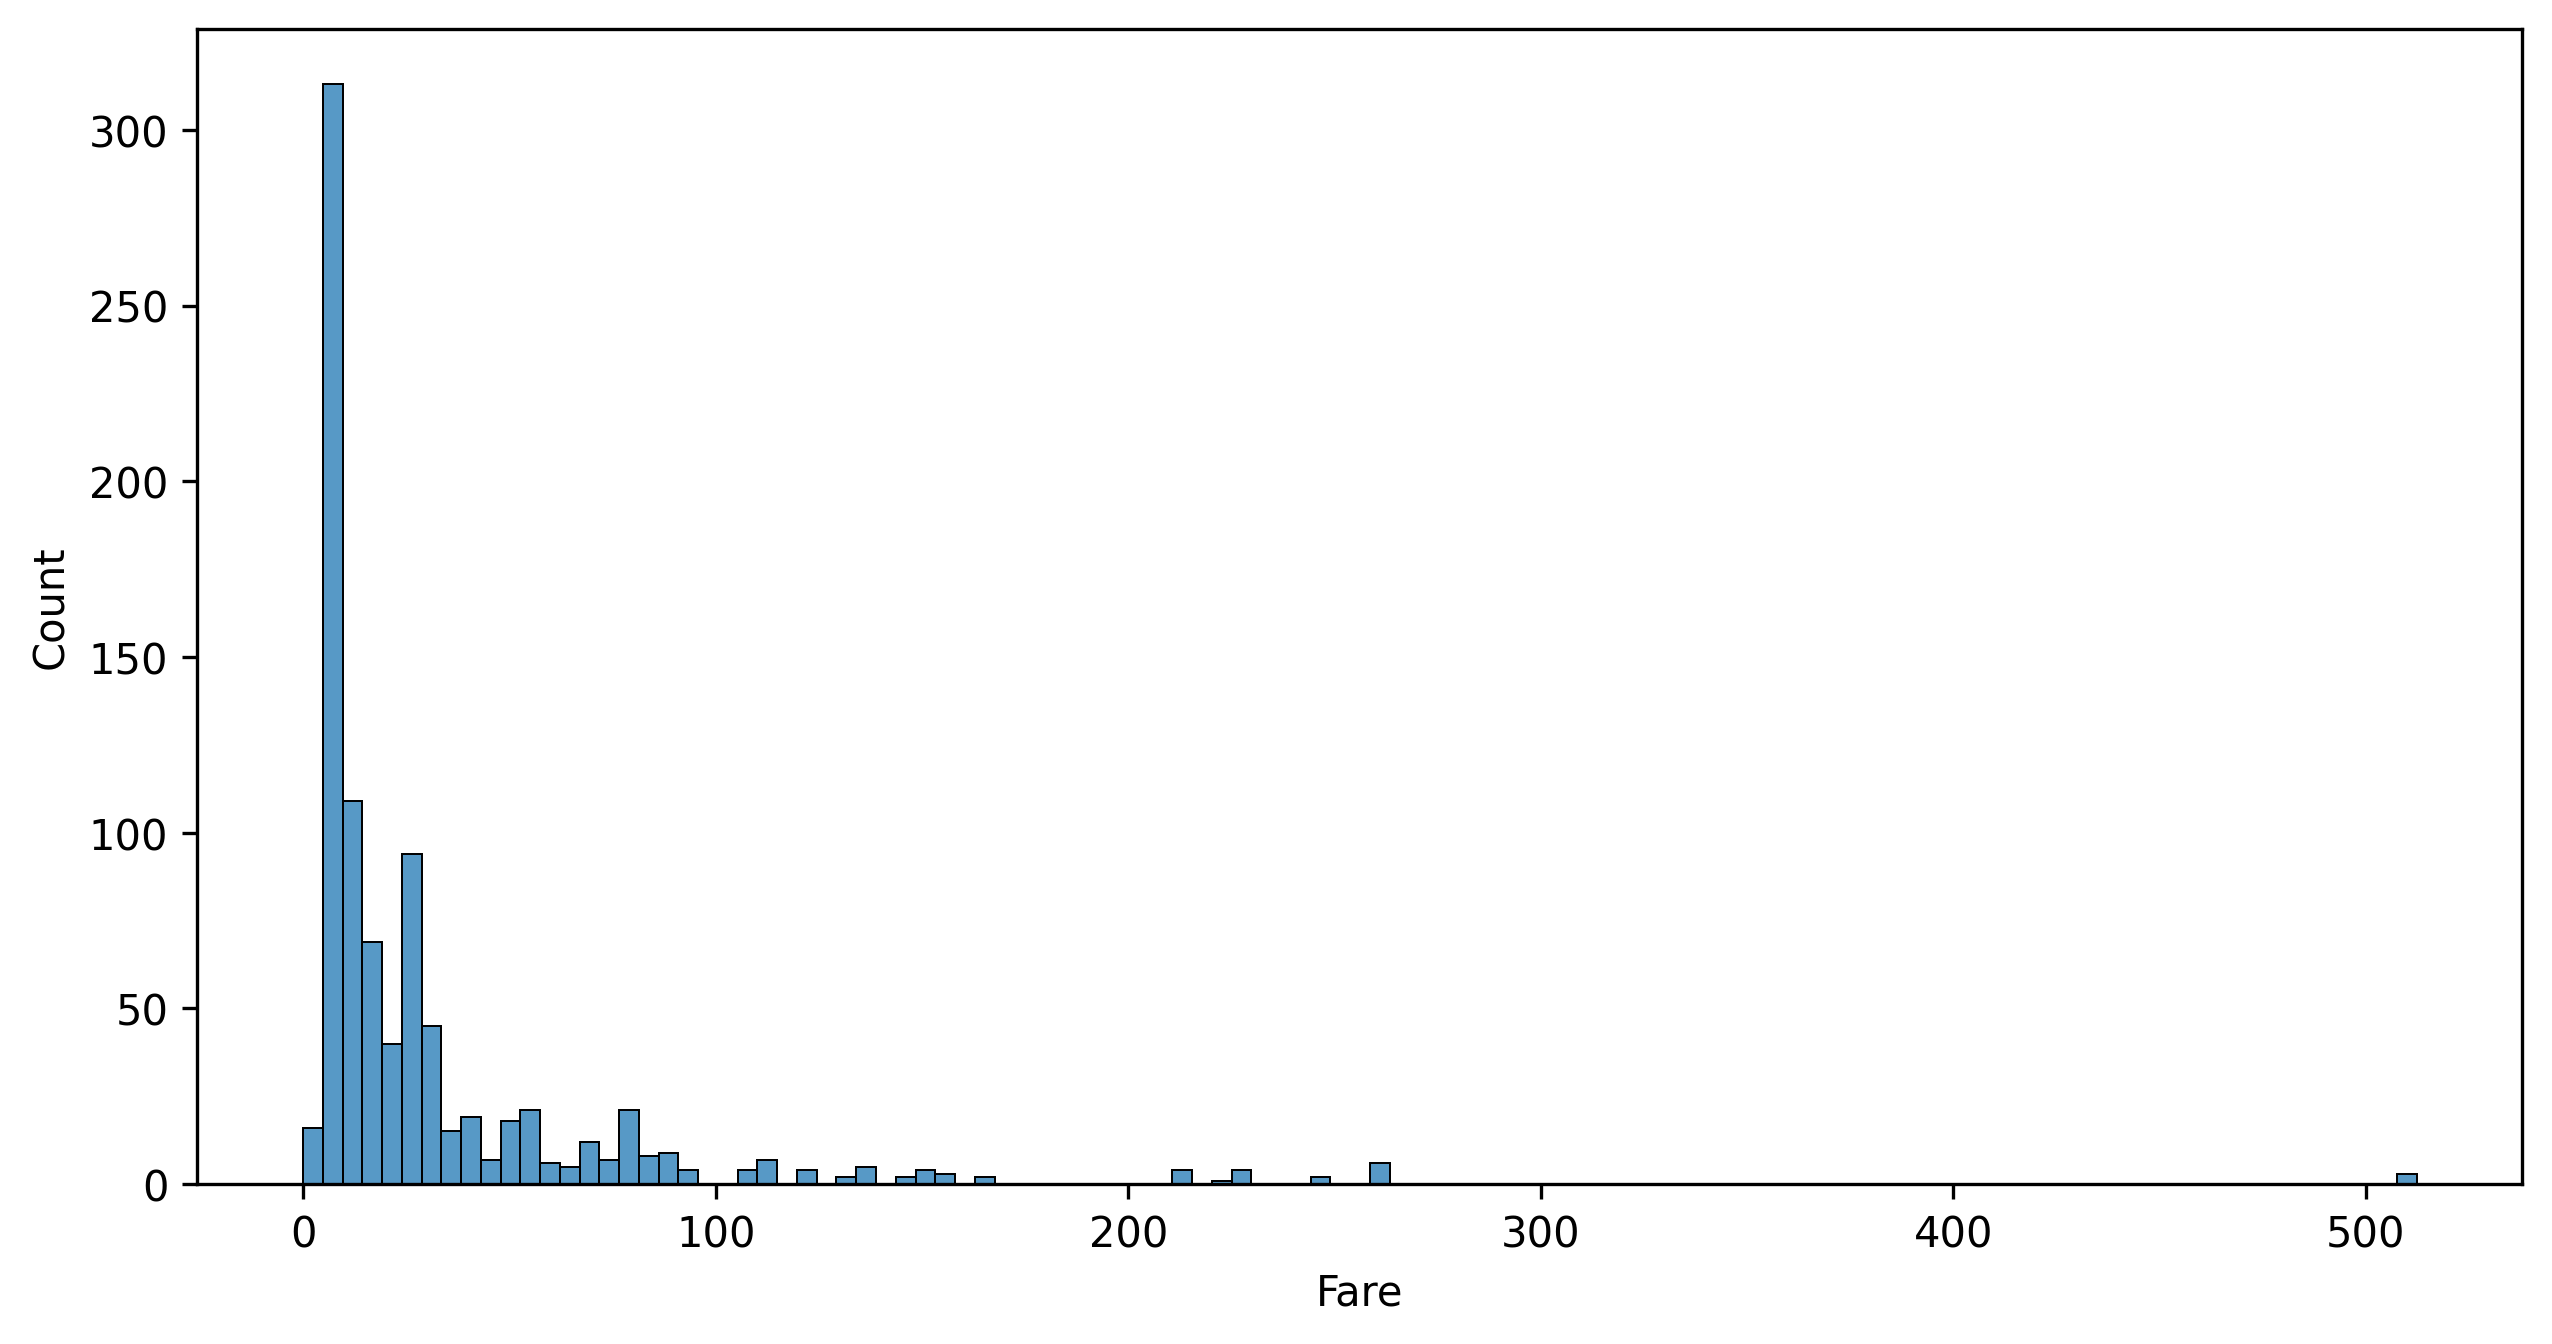

In [24]:
sns.histplot(x = 'Fare', data = titanic);

**Question 18:** Create a histogram that shows the distribution of ages on the Titanic. Manipulate the bins to make the histogram look more readable.

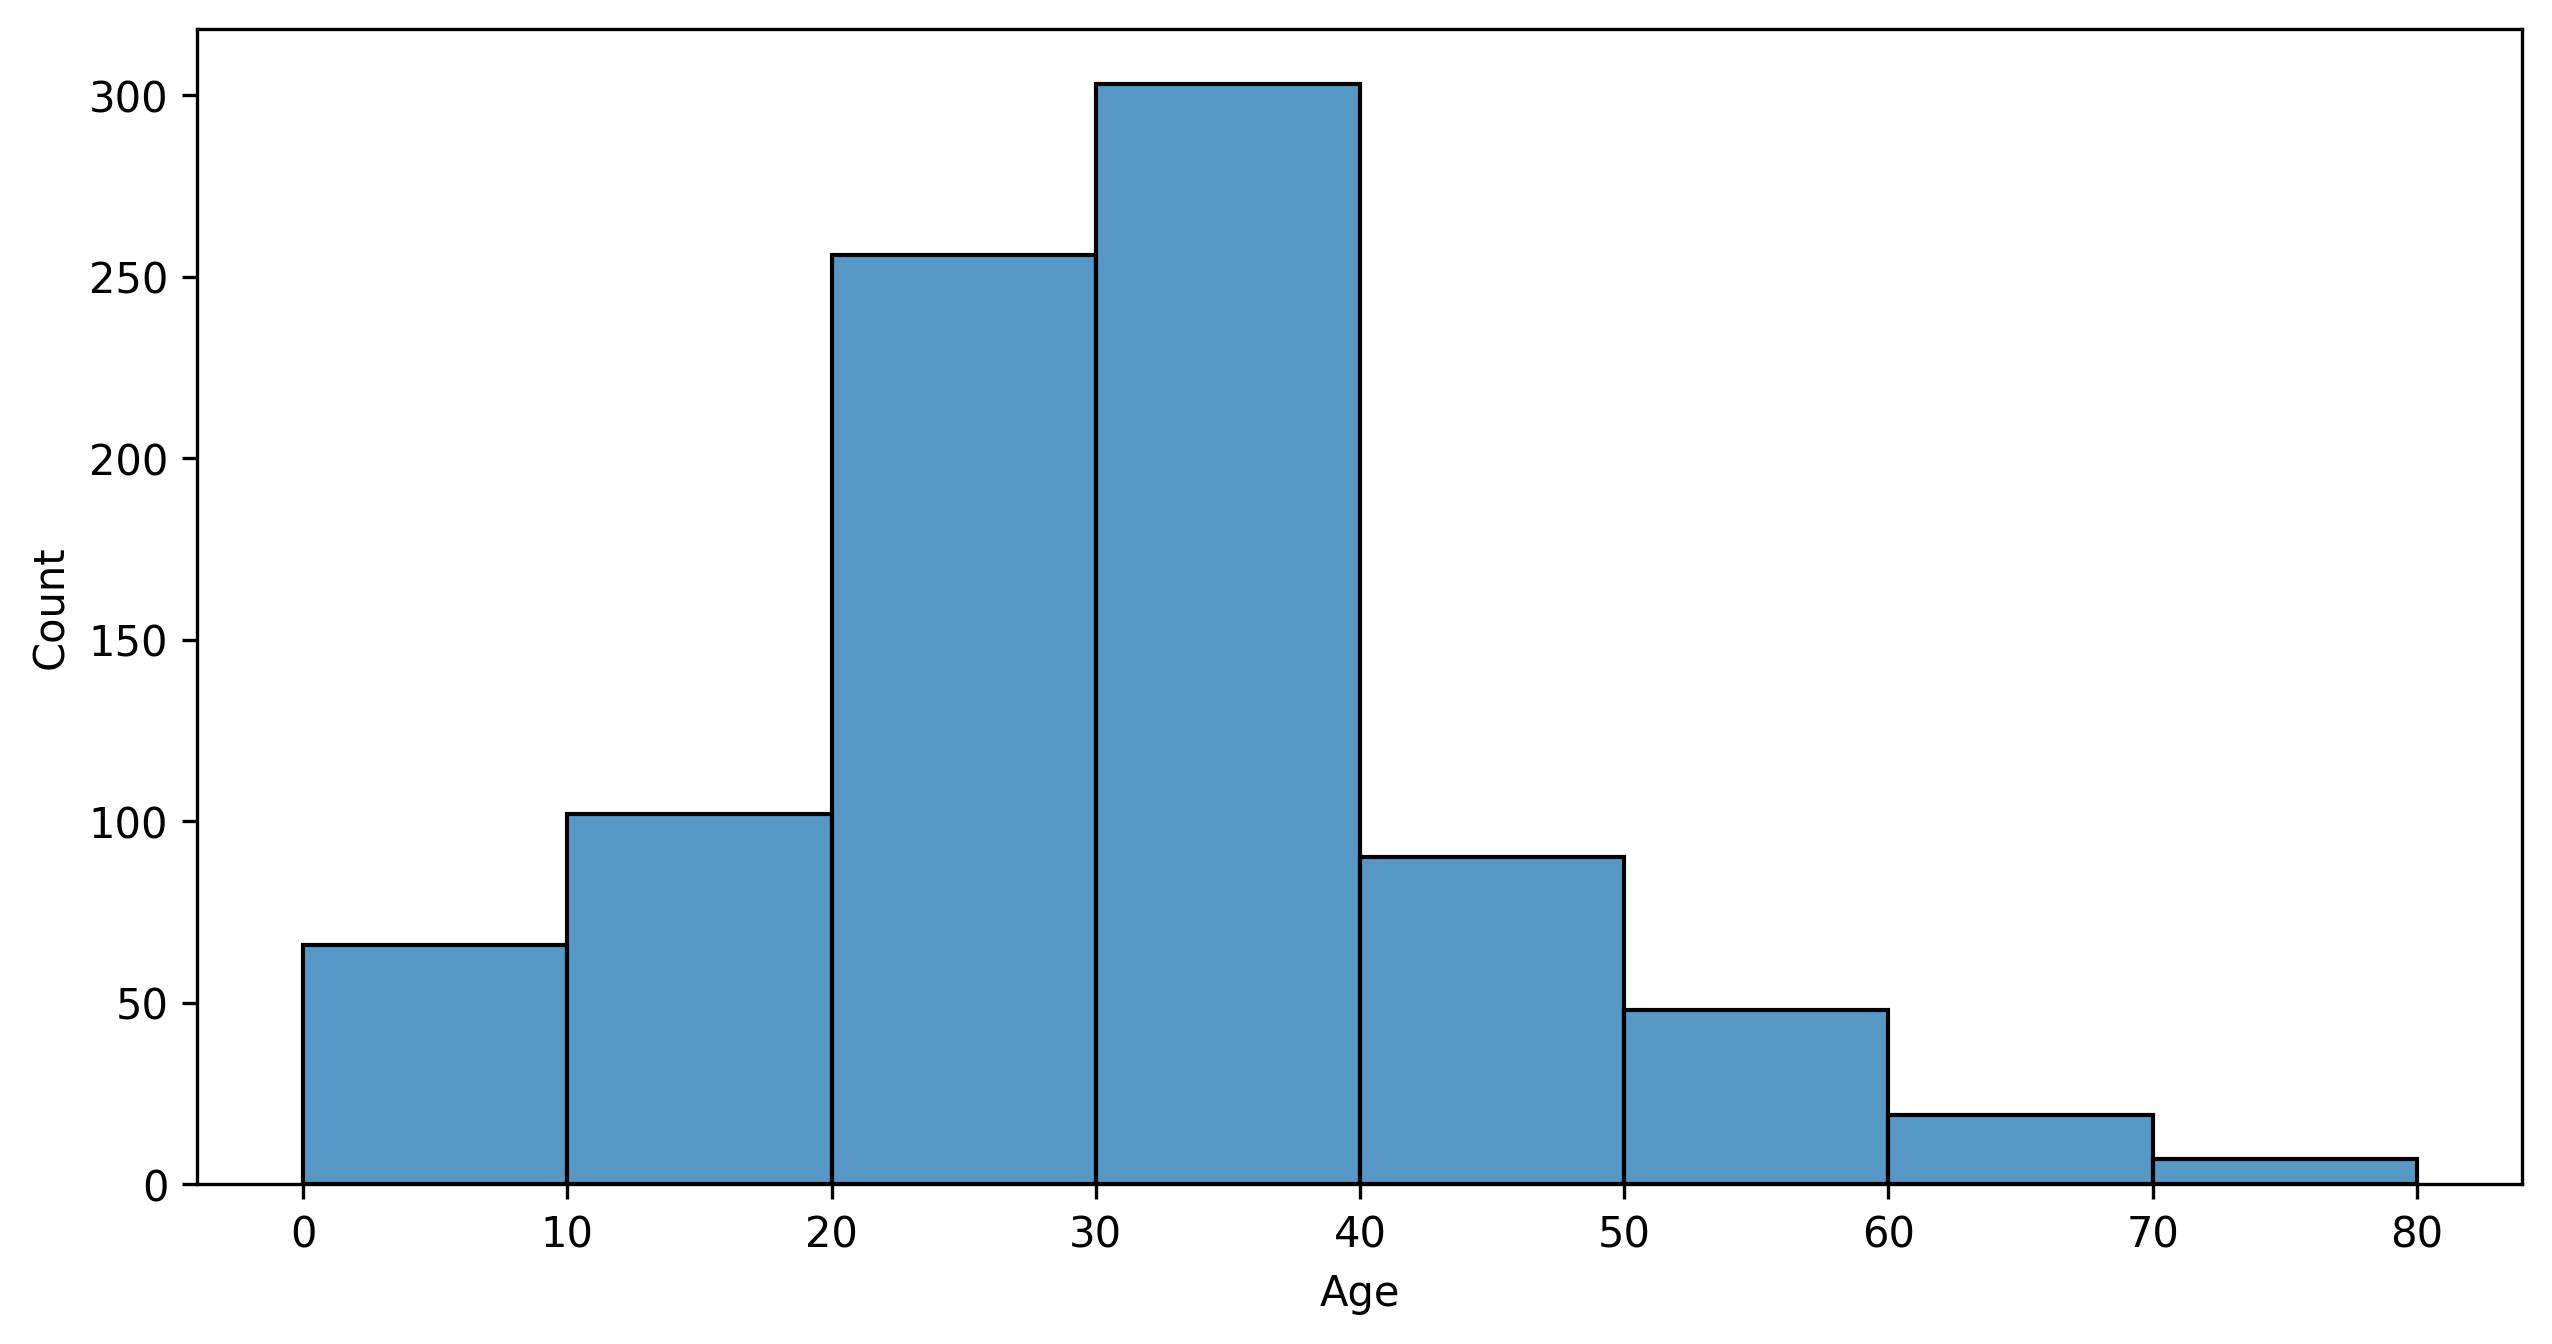

In [25]:
sns.histplot(x = 'Age', data = titanic, bins = np.arange(0, 81, 10));

**Question 19:** Create a bar chart to visualize the amount of people in each class.

Hint: You'll have to group the table values in a certain way before converting it into a bar chart.

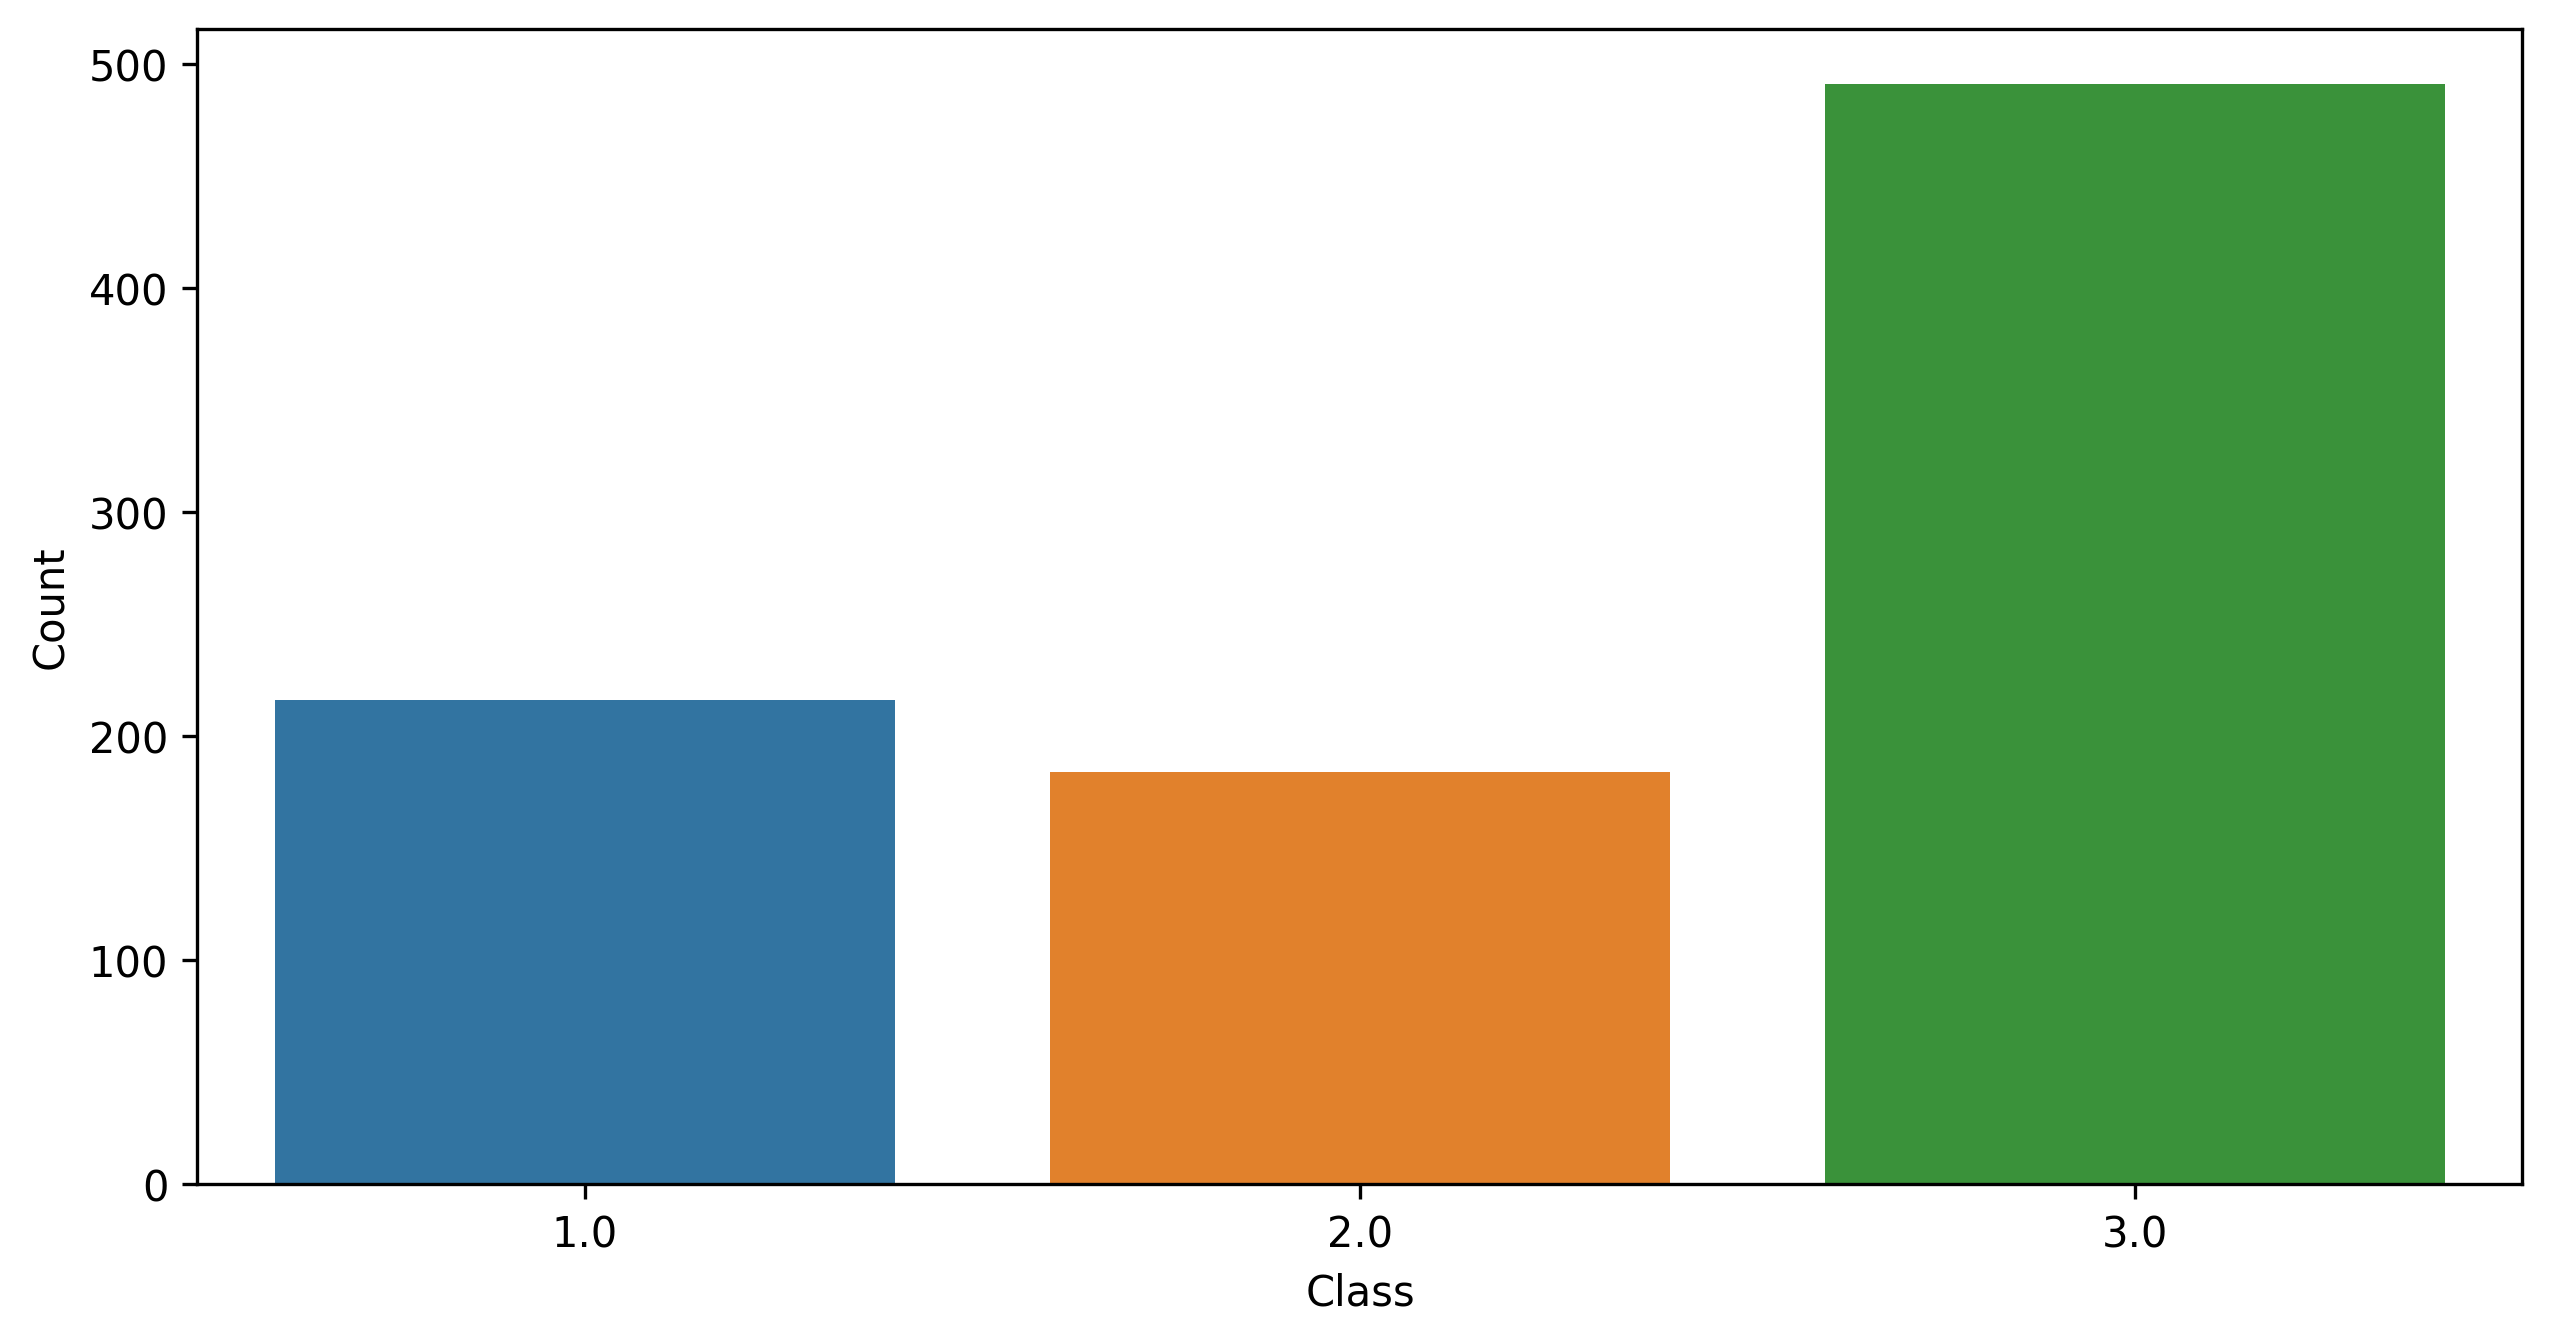

In [26]:
class_count = titanic.groupby('Class').count()
class_count["Count"] = class_count["Age"]
sns.barplot(data=class_count, x=class_count.index, y=class_count["Count"]);

**Question 20:** Assign `fare_class` to a new table with only the `Fare` and `Class` columns.

In [27]:
fare_class = titanic.drop(columns = ['Name', 'Age', 'Sex', 'Survived', 'Family Size'])
fare_class.head(5)

,Fare,Class,Family_Size
1,7.2500,3.0,1.0
2,71.2833,1.0,1.0
3,7.9250,3.0,0.0
4,53.1000,1.0,1.0
5,8.0500,3.0,0.0


**Question 21:** Create a bar chart that visualizes the mean fare for each class on the Titanic. Similar to Question 19, you'll have to group by `Class` before creating the bar chart.

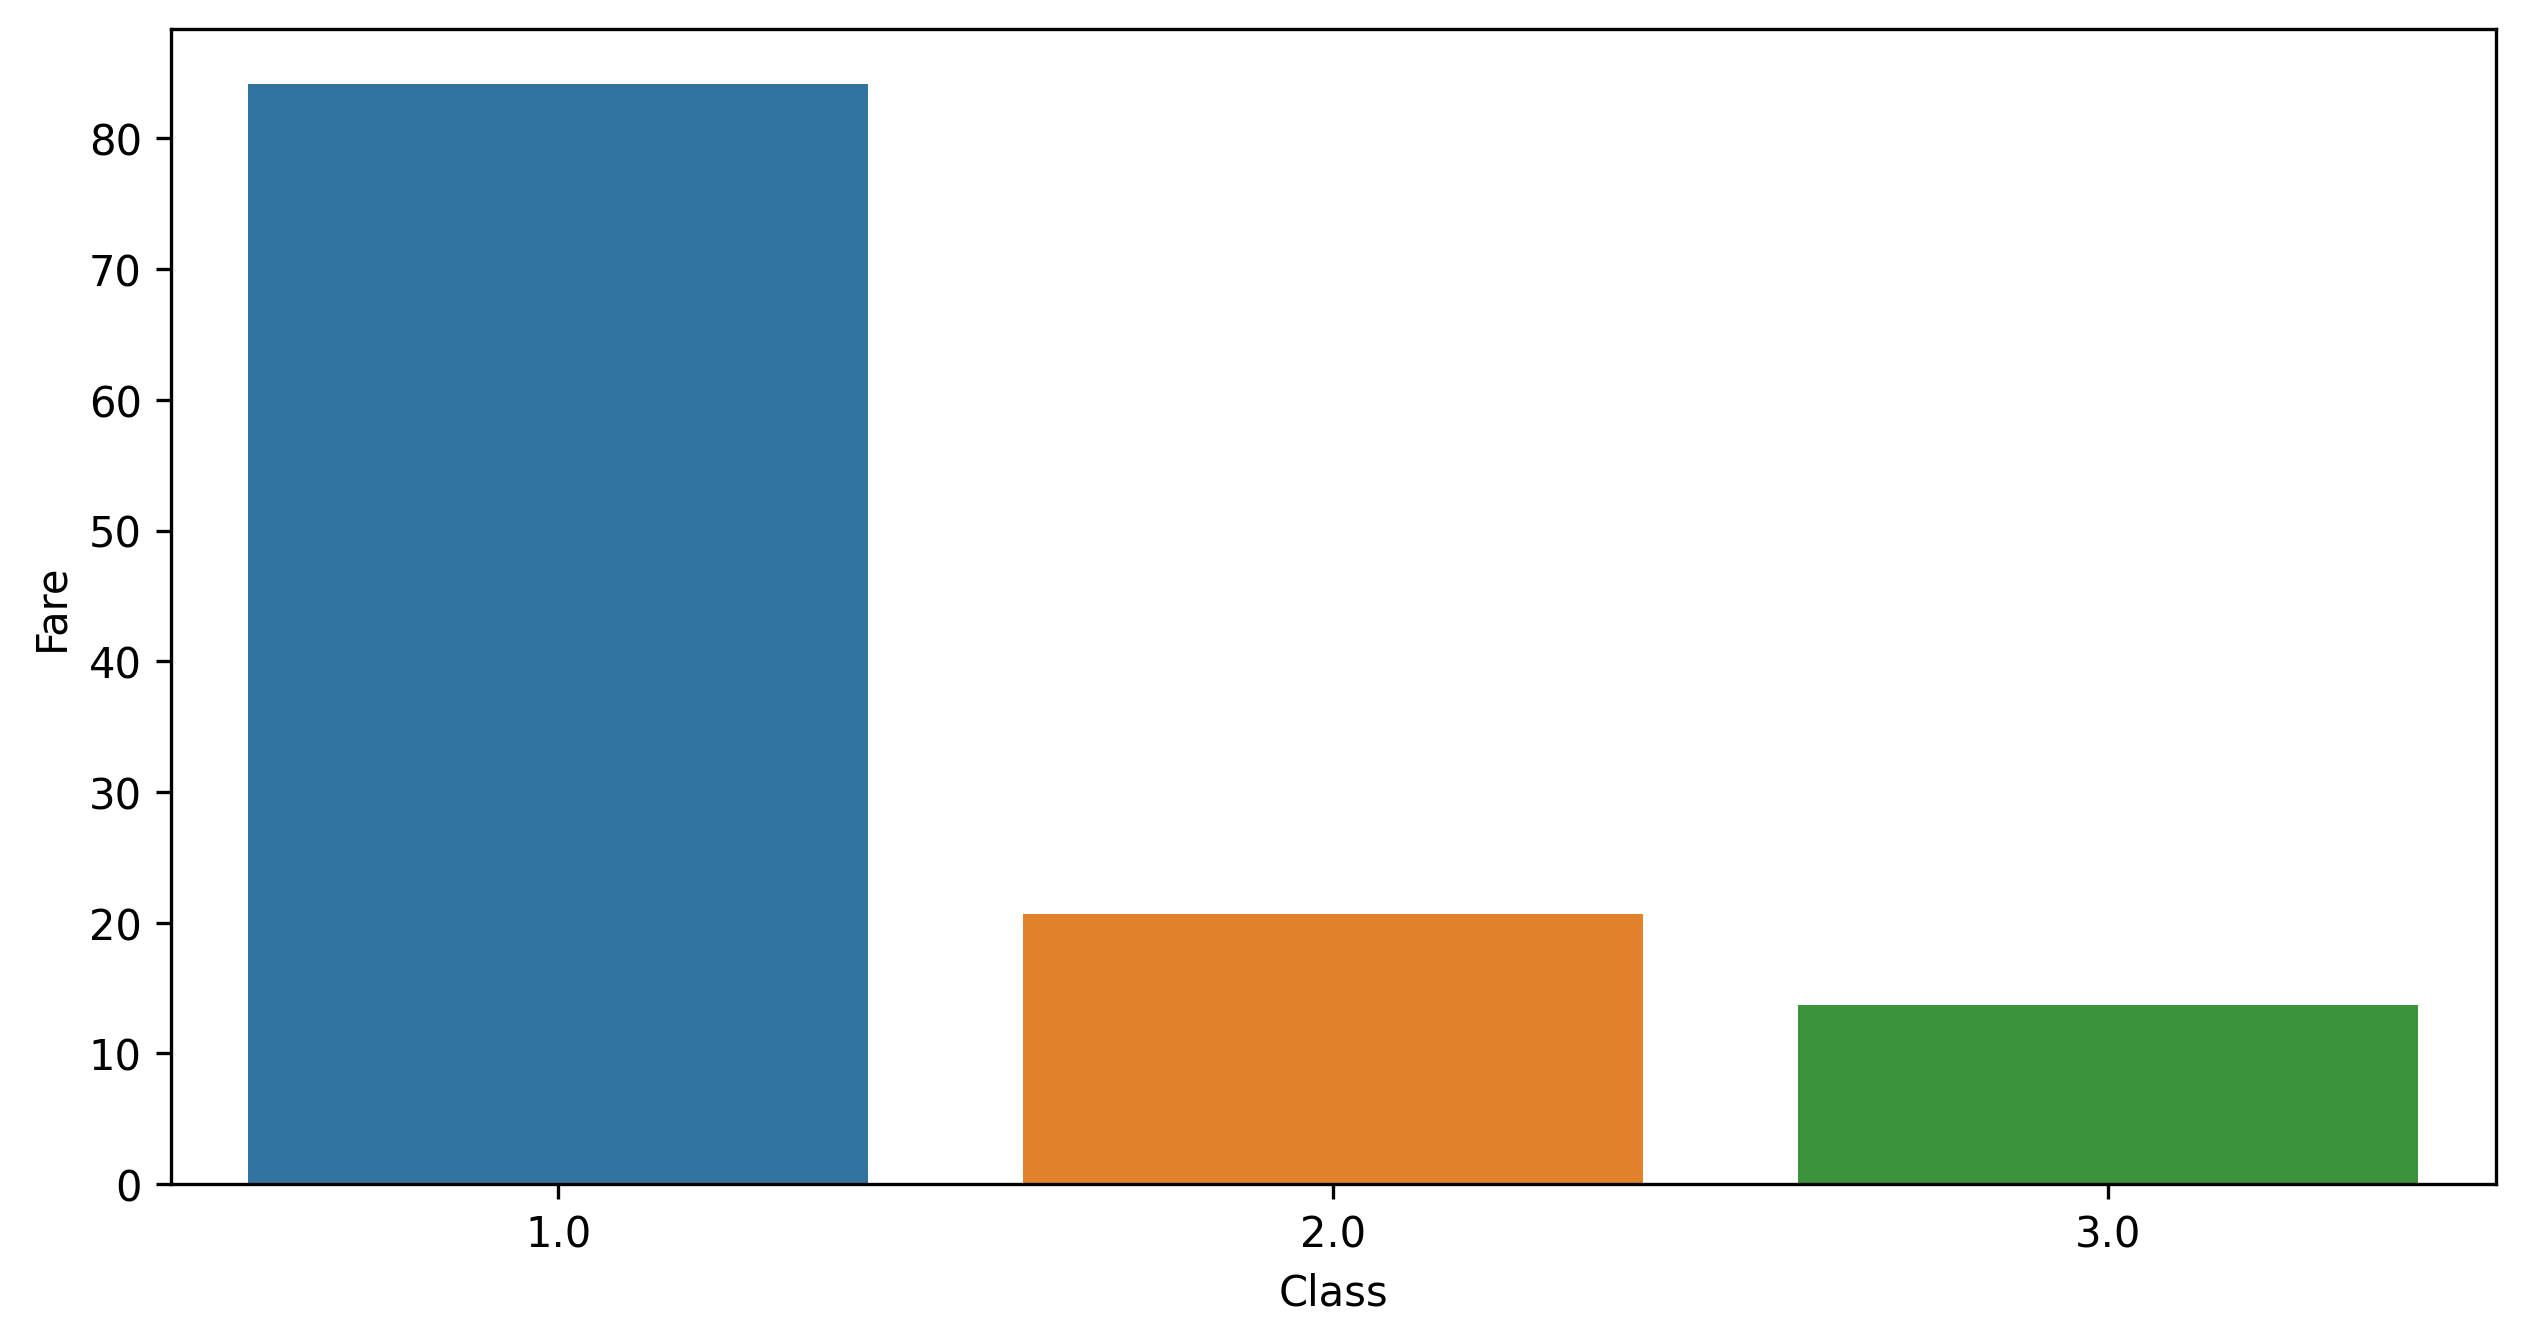

In [28]:
class_grouped = fare_class.groupby('Class').agg(np.mean)
class_grouped
sns.barplot(data=class_grouped, x=class_grouped.index, y=class_grouped['Fare']);

**Question 22:** Complete the next three cells to create a bar chart that visualizes the mean age and fare for each gender. Follow the procedure from the last question if you get stuck.

In [29]:
age_fare = titanic.drop(columns = ['Name', 'Class', 'Survived', 'Family Size'])
age_fare.head(5)

,Age,Fare,Sex,Family_Size
1,22.0,7.2500,male,1.0
2,38.0,71.2833,female,1.0
3,26.0,7.9250,female,0.0
4,35.0,53.1000,female,1.0
5,35.0,8.0500,male,0.0


In [30]:
gender_grouped = age_fare.groupby('Sex').agg(np.mean)
gender_grouped

,Age,Fare,Family_Size
Sex,,,
female,27.648089,44.479818,1.343949
male,30.423172,25.523893,0.665511


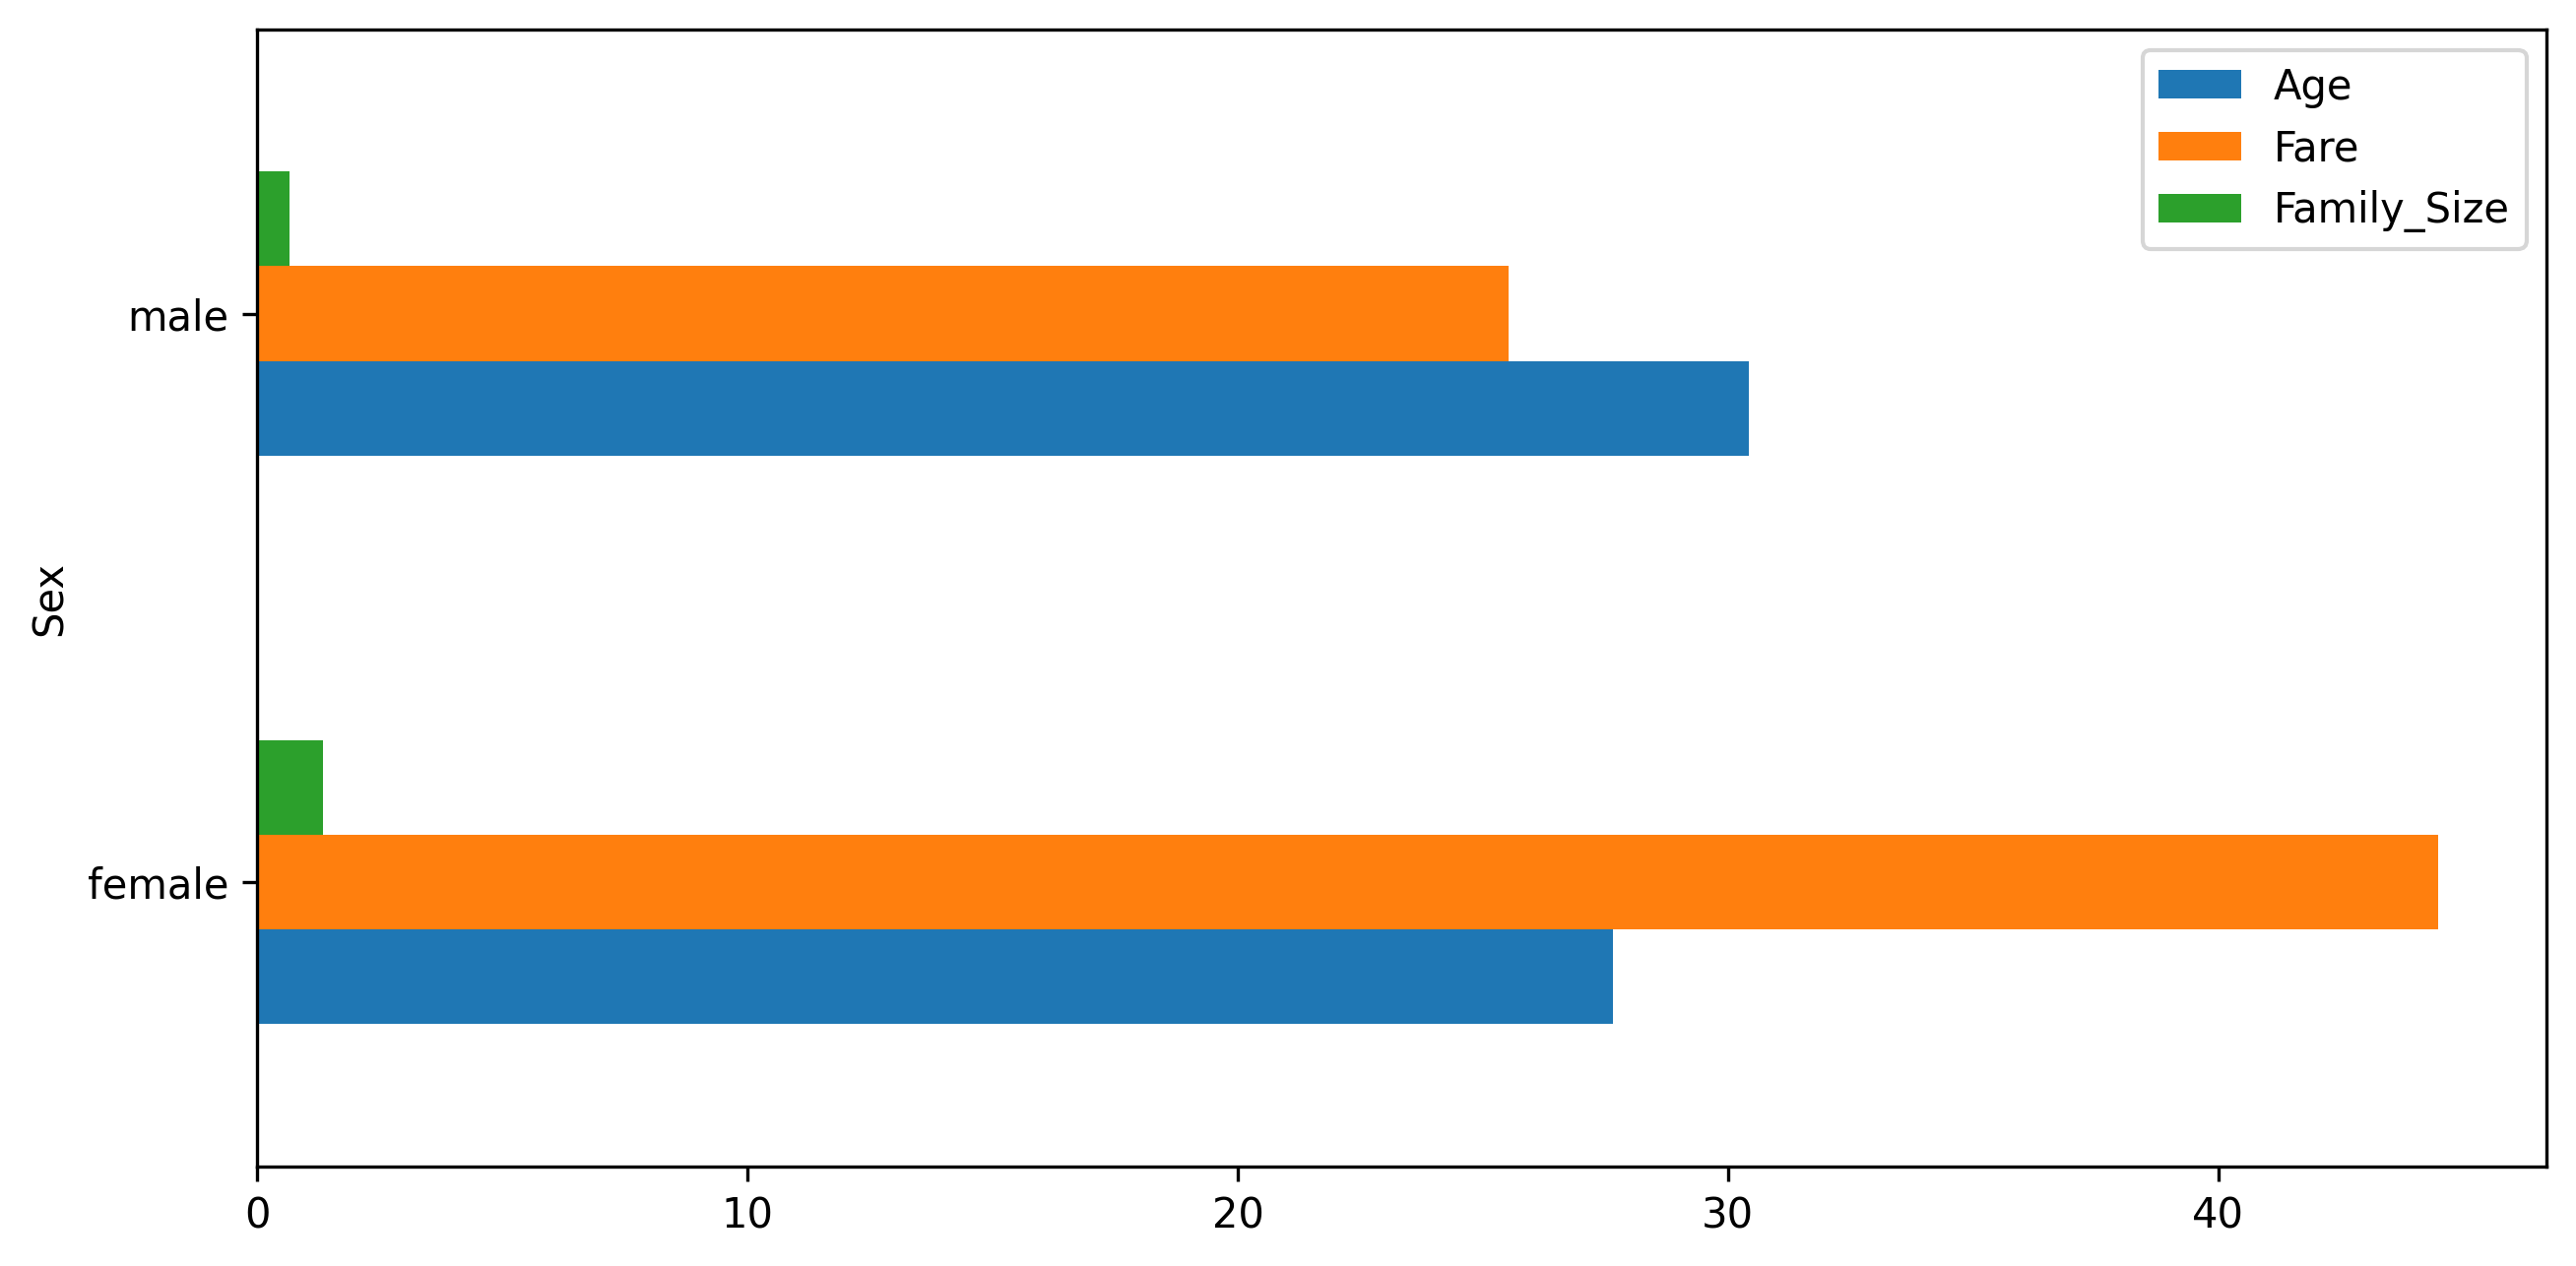

In [31]:
gender_grouped.plot.barh();

**Question 23**: Run this cell to visualize the relationship between fare and age. Do you see any correlation between fare, age, and whether or not the passenger survived?

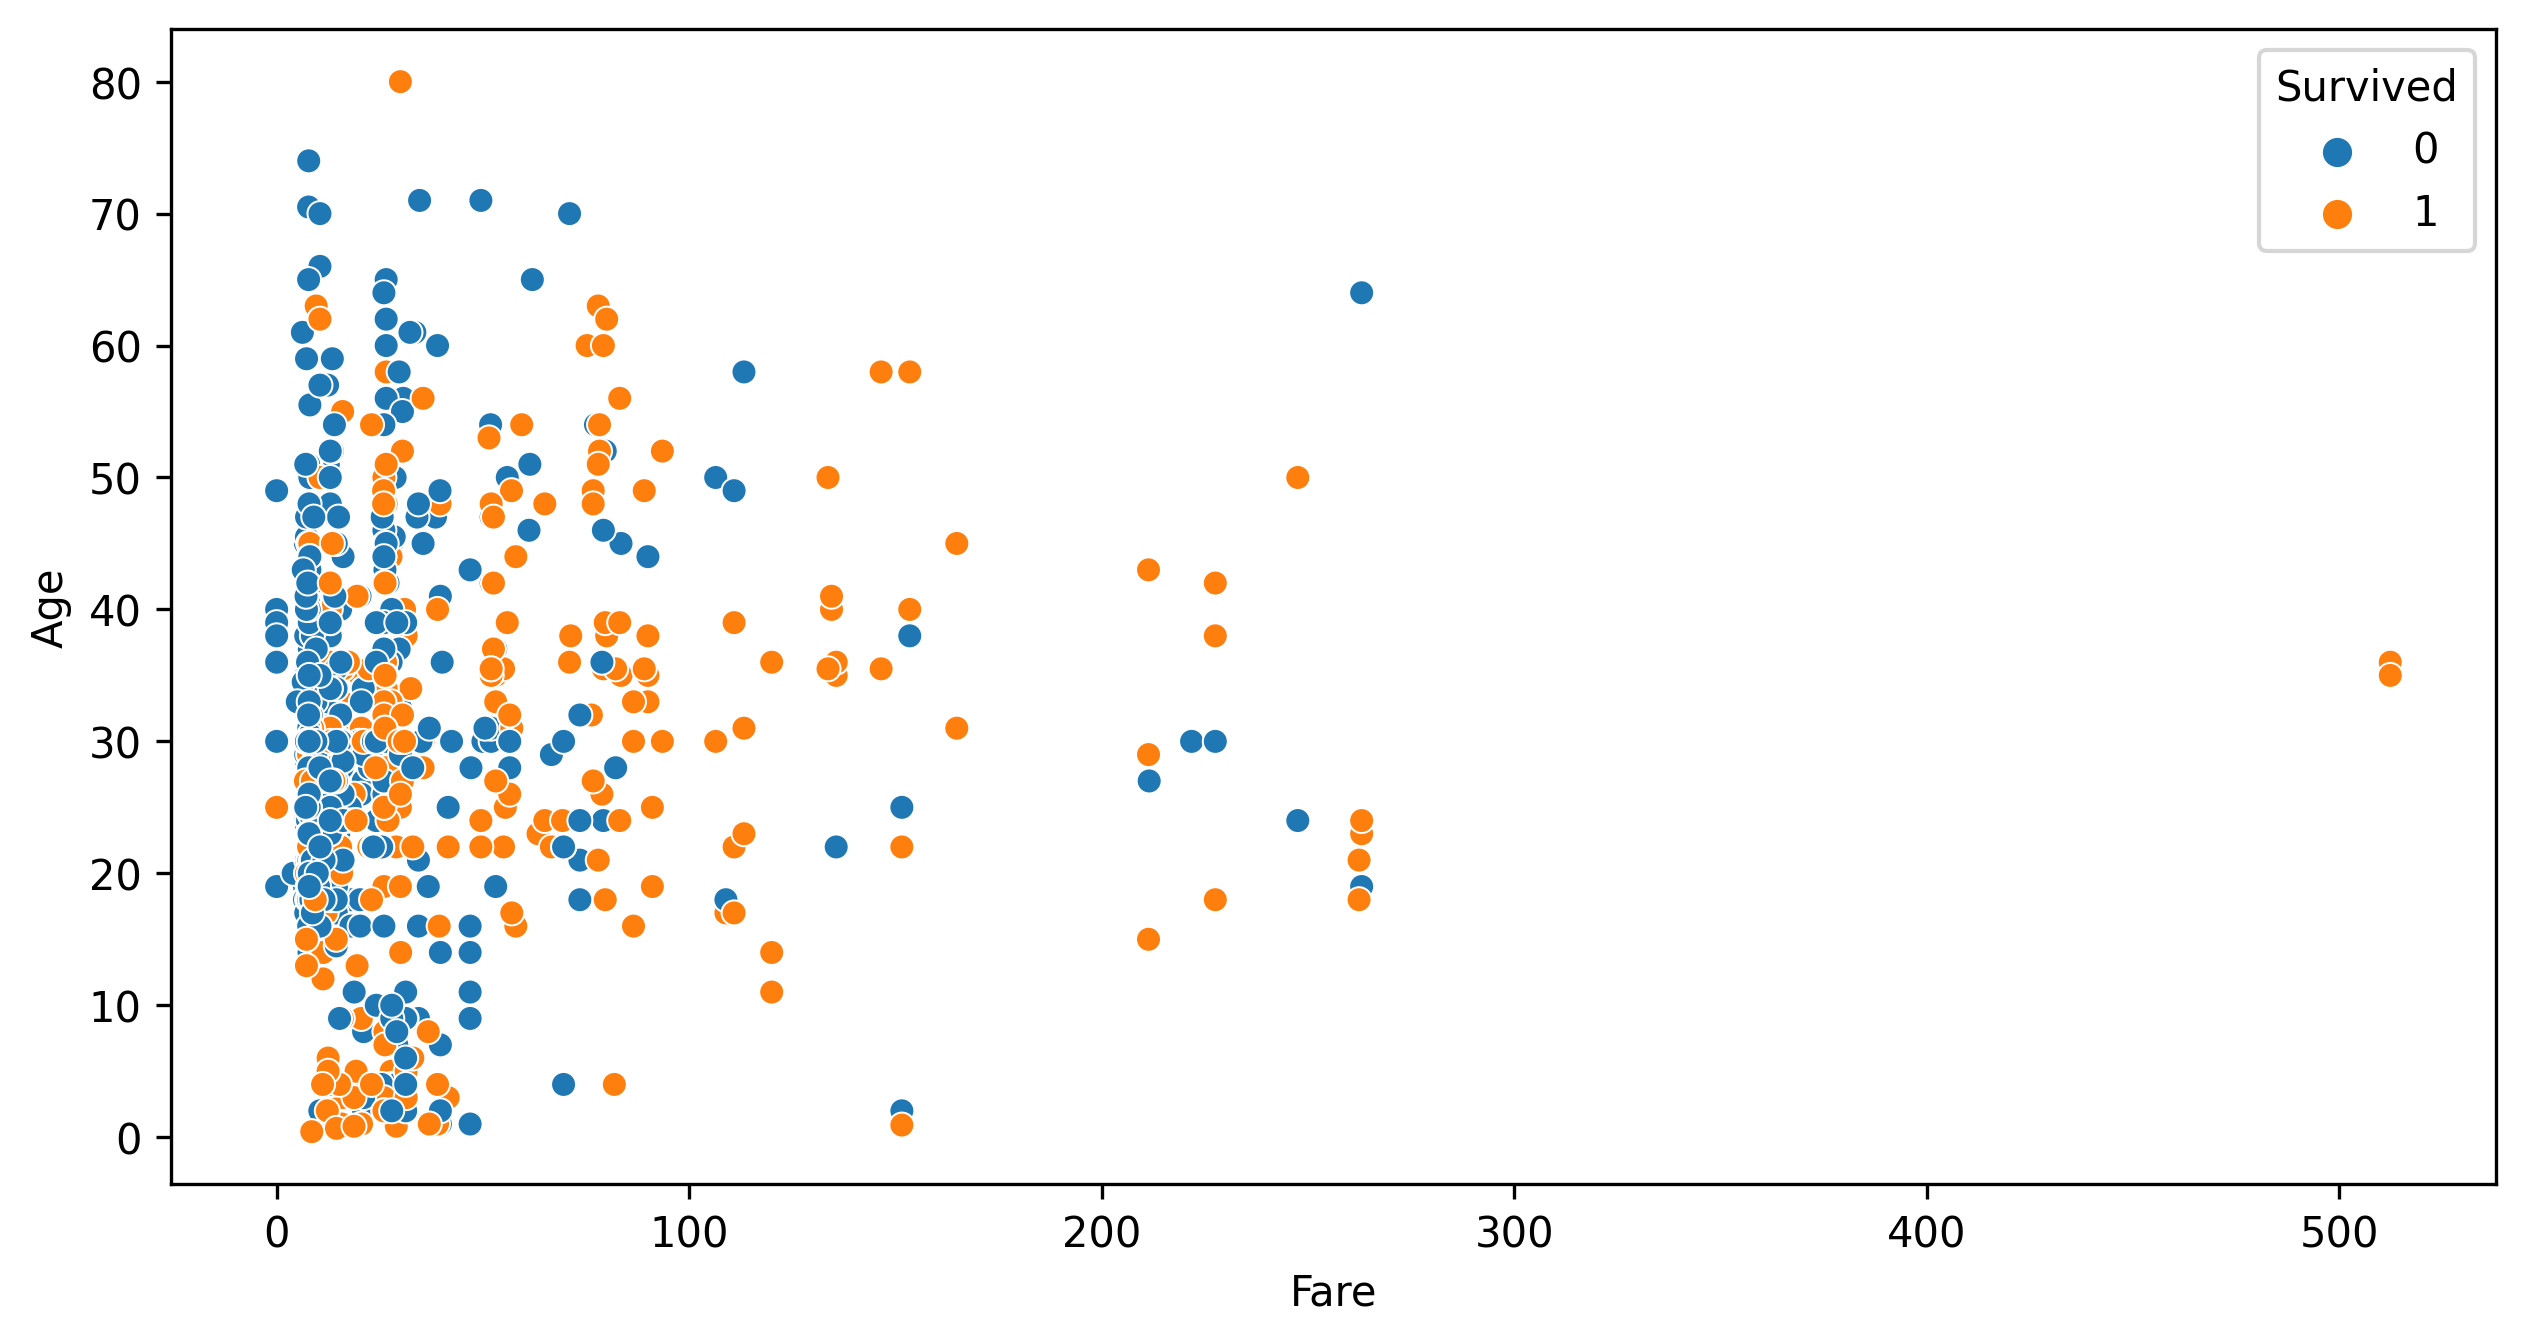

In [33]:
df = pd.read_csv('/content/drive/MyDrive/BDAB-Titanic-Project/titanic_cleaned.csv')
sns.scatterplot(data=df, x="Fare", y="Age", hue='Survived');

**Answer Here:**

Now you should have a better understanding of the data!

## Part 3: A/B Testing

Sometimes, we might have other questions about the data that can't be done during EDA. For example, let's say we want to know whether or not the distributions between Male and Female deaths were from the same distribution (aka is there a variation between male and female deaths on the titanic)? In order to answer this question, we will need to perform A/B Testing!

**Question 24:** Assign `titanic_selected` to a new table with only the `Sex` and `Survived` columns.

In [34]:
titanic_selected = titanic[['Sex', 'Survived']]
titanic_selected

,Sex,Survived
1,male,0
2,female,1
3,female,1
4,female,1
5,male,0
...,...,...
890,male,0
891,female,1
892,female,0
893,male,1


**Question 25:** Write the null and alternative hypotheses.

__Null Hypothesis: The Distribution of deaths would be the same for both males and females. Any differences are purely due to chance.__

__Alternative Hypothesis: The difference in deaths between males and females is not due to random chance.__

**Question 26:** For our test statistic, we are going to find the absolute value of the difference between the proportion of males that survived and the proportion of females that survived.

Complete the `test_statistic()` function below to find that value. This function should return a single integer.

Hint: Use the `num_male` and `num_female` variables that we found in Question 13.

Extra Hint: Remember that when you use the group method with a function as the second argument, it renames the column to include the function at the end.

In [35]:
#grouping is alphabetized, so female comes first.

def test_statistic(tbl):
    num_female = tbl[tbl['Sex'] == 'female'].shape[0]
    num_male = tbl[tbl['Sex'] == 'male'].shape[0]
    survive_count = tbl.groupby('Sex').agg(sum)
    survived = survive_count['Survived']
    return abs(survived[0]/num_female - survived[1]/num_male)

**Question 27:** Use the `test_statistic()` function to find the observed test statistic.

Hint: Use the `titanic_selected` table.

In [36]:
observed_statistic = test_statistic(titanic_selected)
observed_statistic

0.5531300709799203

**Question 28:** Complete the `one_simulated_difference()` function by shuffling the `group_label` column and replacing the original column with the shuffled one. This function should return the test statistic of the shuffled table.

Hint: To find `shuffled_labels`, you may need to use the `.sample()` method. Should `with_replacement` be True or False?

In [37]:
def one_simulated_difference(table, label, group_label):
    shuffled_labels = table.sample(n = table.shape[0], replace = False)[group_label].reset_index(drop = True)
    shuffled_table = table[[label]]
    shuffled_table[group_label] = shuffled_labels
    return test_statistic(shuffled_table)

**Question 29:** Apply the `one_simulated_difference()` function to the `titanic_selected` table in the next cell.

In [38]:
one_sim_diff = one_simulated_difference(titanic_selected, 'Survived', 'Sex')
one_sim_diff

0.002006688963210712

**Question 30:** In the previous questions, we calculated the test statistic for one shuffled table. Now, we want to do this **1000** times! We do this so that we can compare our test statistics across lots of simulations.

Heads up: This cell might take a while to run!

In [39]:
differences = np.array([])

repetitions = 1000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference(titanic_selected, 'Survived', 'Sex')
    differences = np.append(differences, new_difference)

differences

array([0.01492247, 0.03167224, 0.01985951, 0.04925916, 0.01163838,
       0.00504837, 0.03273085, 0.00808128, 0.00670846, 0.00177855,
       0.04156076, 0.05144928, 0.05144928, 0.0227146 , 0.01683946,
       0.01492247, 0.02765886, 0.01683946, 0.03260312, 0.02765886,
       0.01876228, 0.02371383, 0.05107769, 0.01282609, 0.04432212,
       0.0474359 , 0.00482573, 0.01777035, 0.00998542, 0.01492247,
       0.02479656, 0.00390765, 0.00482573, 0.01589854, 0.01963687,
       0.00200669, 0.00390765, 0.04925916, 0.06407031, 0.05245051,
       0.01876228, 0.01683946, 0.0157321 , 0.02866537, 0.07079735,
       0.00504837, 0.03444802, 0.07122631, 0.01189521, 0.00200669,
       0.02672798, 0.00293757, 0.01683946, 0.01492247, 0.02479656,
       0.03467066, 0.04156076, 0.00670846, 0.00885919, 0.06093752,
       0.00482573, 0.01963687, 0.00011132, 0.01963687, 0.00670846,
       0.01469983, 0.04352001, 0.02973361, 0.04432212, 0.03260312,
       0.00504837, 0.02765886, 0.00788183, 0.01683946, 0.02780

**Question 31:** Now we want to find the `p_value`, which we use to determine whether male and female survivability comes from the same distribution. Complete the next cell to find the `p_value`.

Hint: We want to compare all of our test statistics from the last question with the observed test statistic.

In [40]:
p_value = np.count_nonzero(differences >= observed_statistic) / repetitions
p_value

0.0

**Run the cell below** to visualize the observed test statistic (red dot), and the distribution of our simulated test statistics.

Observed Difference: 0.5531300709799203
Empirical P-value: 0.0


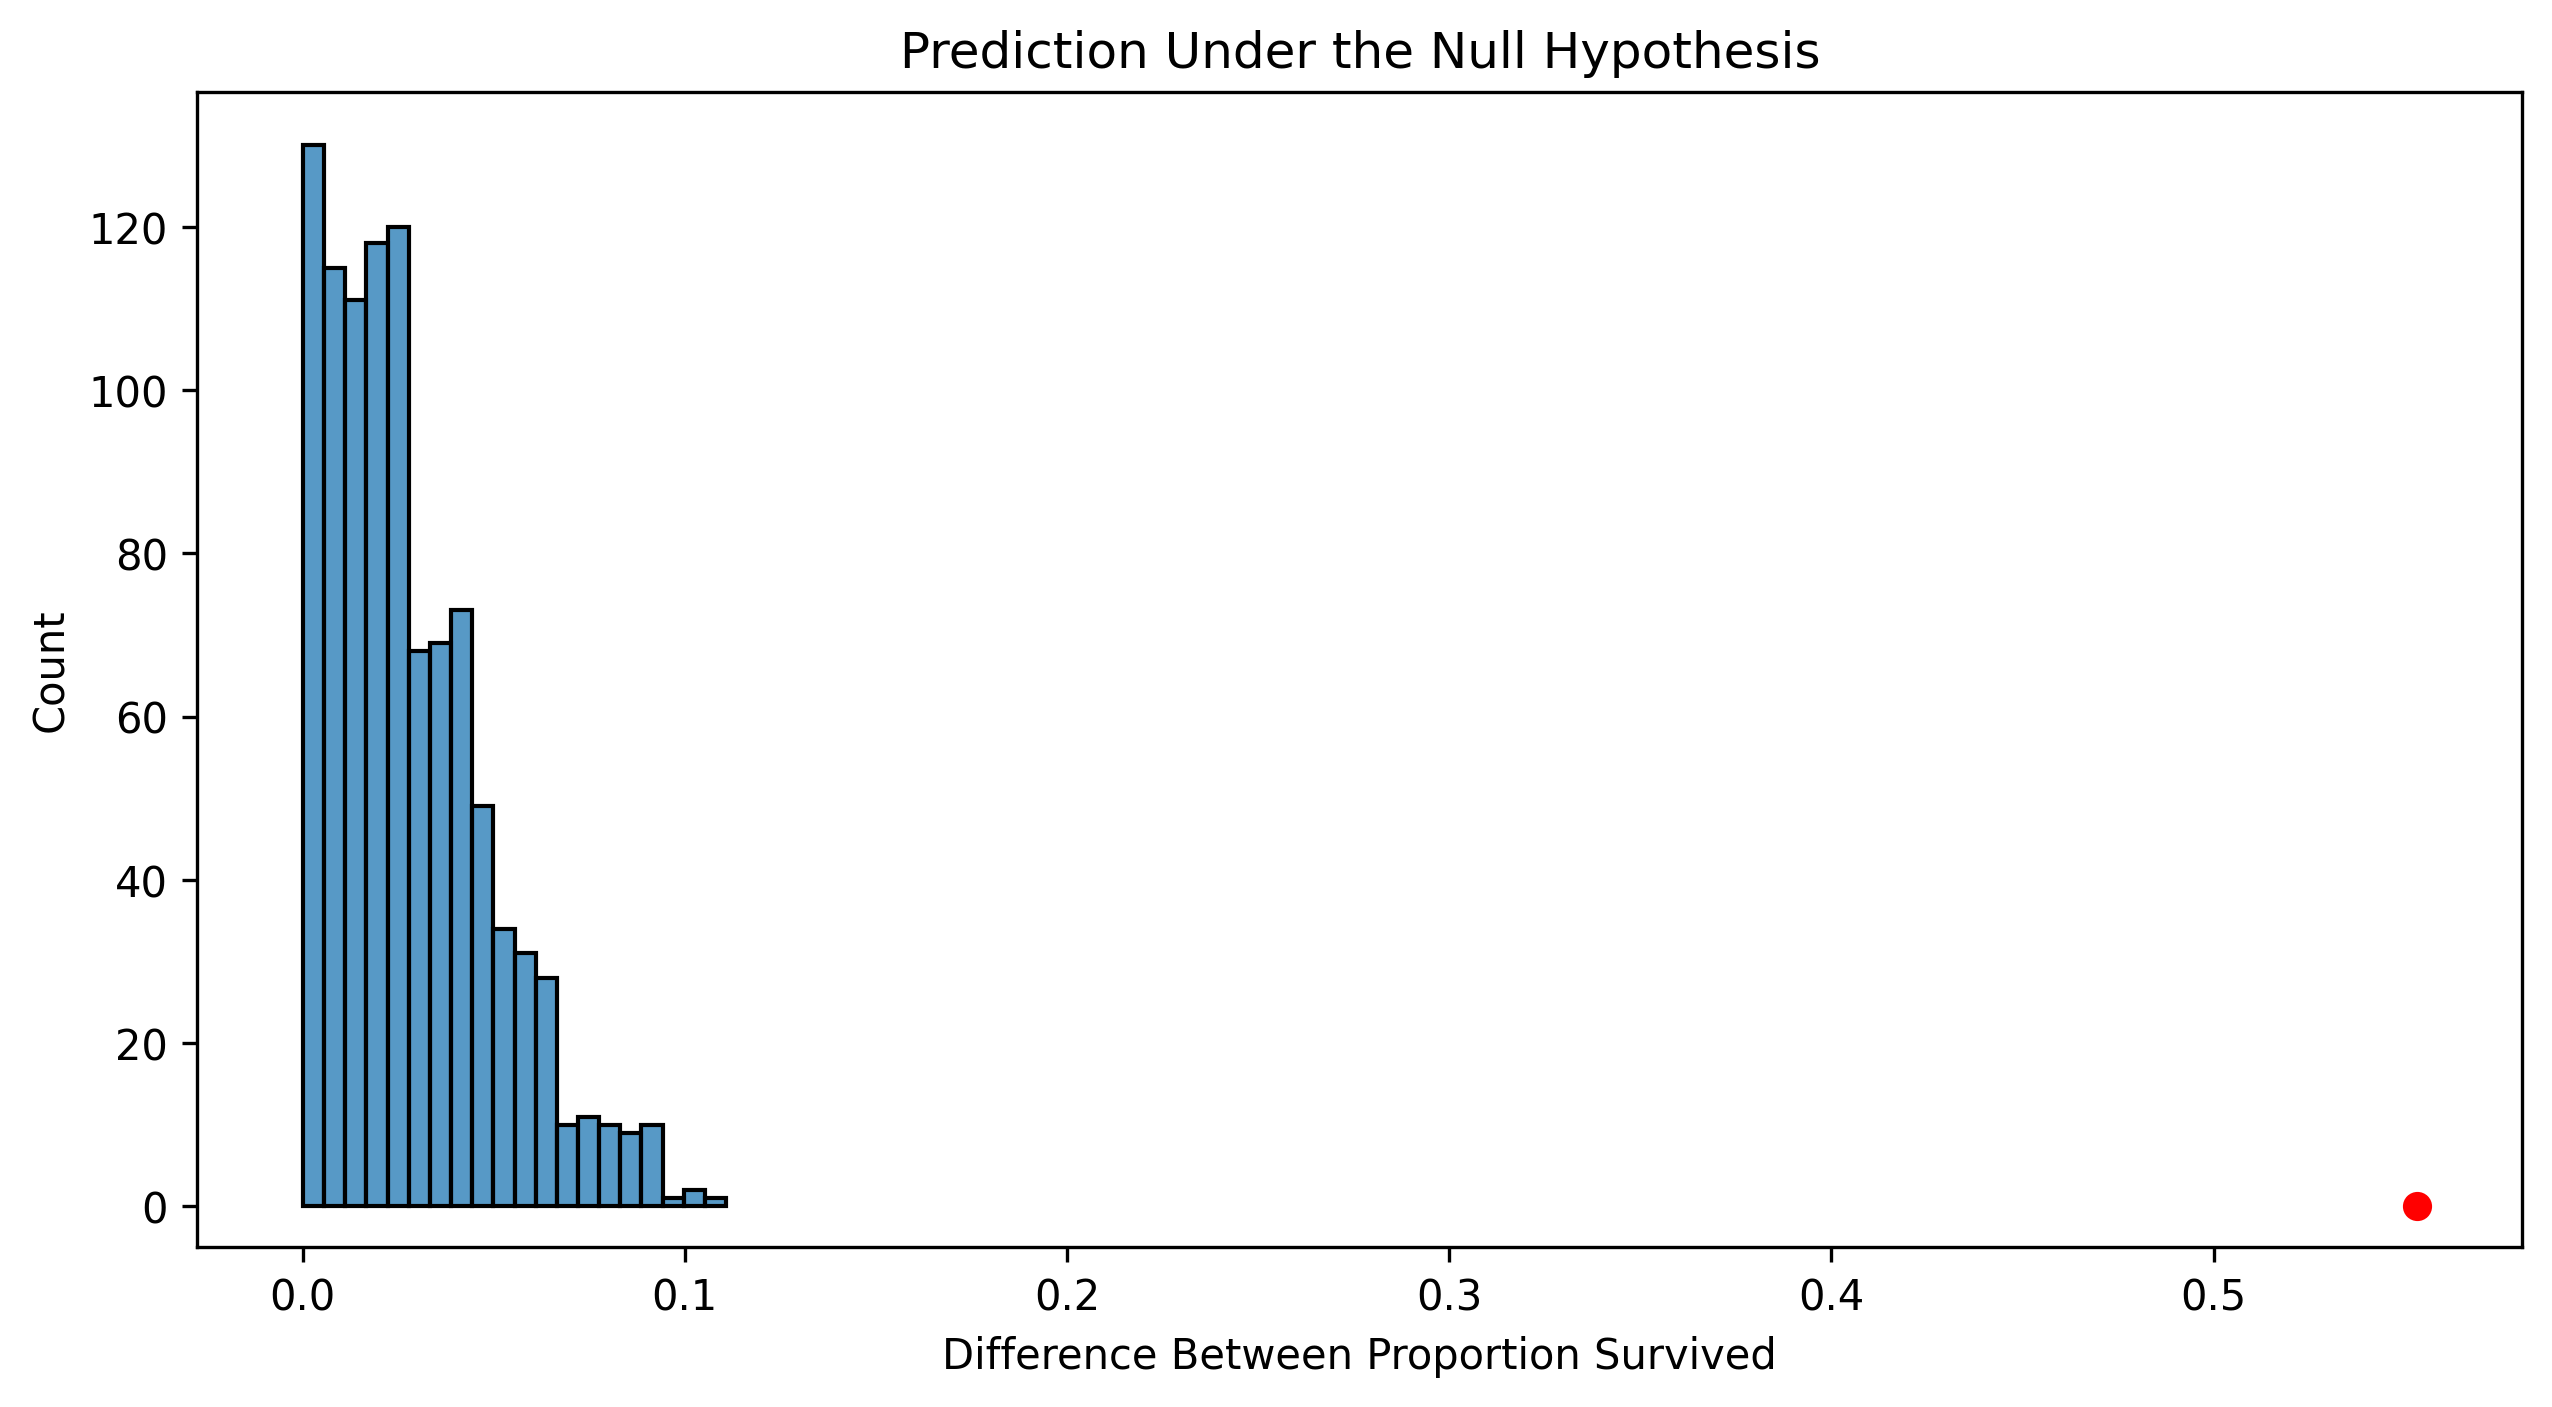

In [41]:
df = pd.DataFrame({'Difference Between Proportion Survived': differences})
sns.histplot(data = df, x = 'Difference Between Proportion Survived')
plt.scatter(observed_statistic, 0, color='red')
plt.title('Prediction Under the Null Hypothesis')
plt.ylim(-5)
print('Observed Difference:', observed_statistic)
print('Empirical P-value:', p_value)

**Wow!** Notice how far off the observed test statistic is from our simulated test statistics. This explains why our p_value is 0.

The next cell shows a cool visualization of the males and females that survived. On the x axis, 1's and 0's hold the same meaning that we assigned them earlier.

We can see that there is a huge difference in survivability by gender.

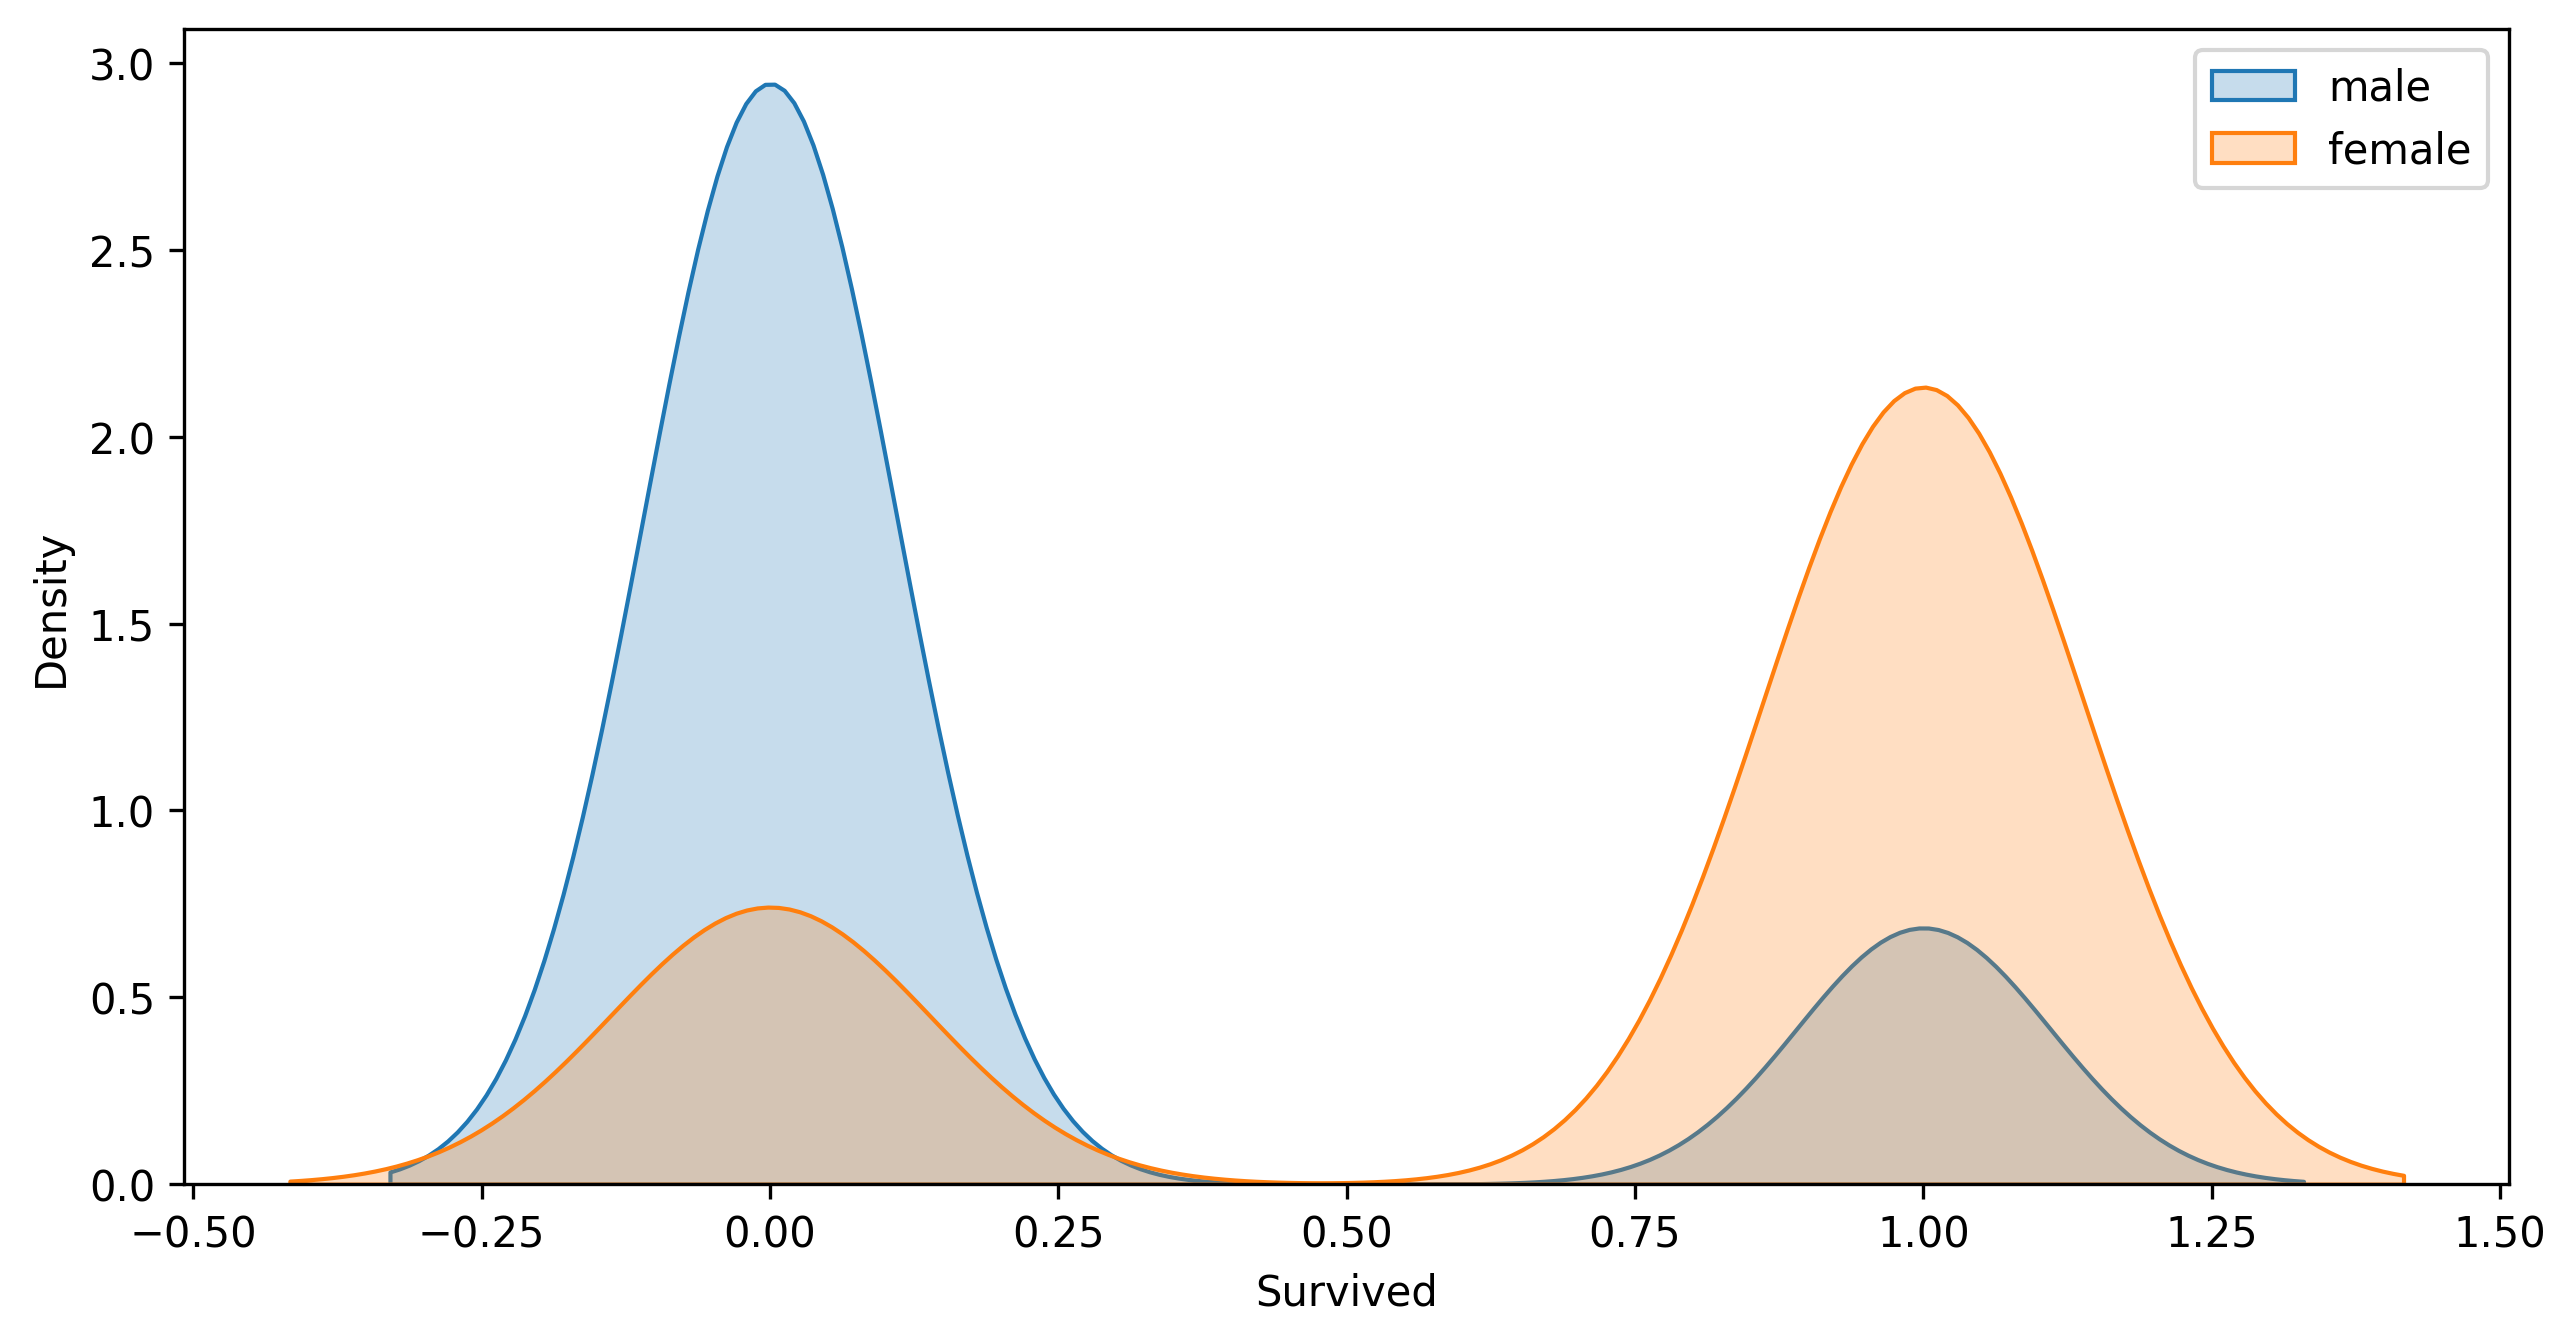

In [43]:
## Don't change this cell, just run it

titanic_df = pd.read_csv('/content/drive/MyDrive/BDAB-Titanic-Project/titanic_cleaned.csv')
titanic_df = titanic_df[['Sex', 'Survived']]

sns.kdeplot(titanic_df[titanic_df["Sex"] == "male"]["Survived"], label = "male", fill=True)
sns.kdeplot(titanic_df[titanic_df["Sex"] == "female"]["Survived"], label = "female", fill=True)
plt.legend();

##### __With a p-value of 0.0, we can reject the null hypothesis and say that the difference in proportion survived between males and females is not due to random chance.  From the looks of it, seems like more females survived  than males on the Titanic!__

Thanks to hypothesis like A/B Testing, we can get an even stronger understanding of our data.

## Part 4: Splitting the Dataset

Now let's start creating our own machine learning model. But one very important step before that is splitting up the dataset. Splitting the Dataset involves splitting the dataset into two parts: a training set and testing set. Eventually we will be using our training set data to train our machine learning model, and then we will test our machine learning model with our testing data.

First, let's pull up our clean datasets.

In [44]:
titanic

,Age,Fare,Name,Class,Sex,Survived,Family Size,Family_Size
1,22.0,7.2500,"Braund, Mr. Owen Harris",3.0,male,0,1.0,1.0
2,38.0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,female,1,1.0,1.0
3,26.0,7.9250,"Heikkinen, Miss. Laina",3.0,female,1,0.0,0.0
4,35.0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,female,1,1.0,1.0
5,35.0,8.0500,"Allen, Mr. William Henry",3.0,male,0,0.0,0.0
...,...,...,...,...,...,...,...,...
890,27.0,13.0000,"Montvila, Rev. Juozas",2.0,male,0,0.0,0.0
891,19.0,30.0000,"Graham, Miss. Margaret Edith",1.0,female,1,0.0,0.0
892,22.0,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",3.0,female,0,3.0,3.0
893,26.0,30.0000,"Behr, Mr. Karl Howell",1.0,male,1,0.0,0.0


**Question 32:** Fill in the `num_train` and `num_test` variables to get the number of rows in each category. Use the `training_proportion` and `total` variables to do this.

In [45]:
# Here we have defined the proportion of our data
# that we want to designate for training as 17/20ths
# of our total dataset.  3/20ths of the data is
# reserved for testing.

training_proportion = 17/20
total = titanic.shape[0]

num_train = int(total * training_proportion)
num_test = total - num_train

train_titanic = titanic.take(np.arange(num_train))
test_titanic = titanic.take(np.arange(num_train, total))

print("Training: ",   train_titanic.shape[0], ";",
      "Test: ",       test_titanic.shape[0])

Training:  757 ; Test:  134


In [46]:
# Don't change the cell below, just run it!

survived_train = train_titanic[train_titanic['Survived'] == 1].shape[0] / num_train
died_train = train_titanic[train_titanic['Survived'] == 0].shape[0] / num_train


survived_test = test_titanic[test_titanic['Survived'] == 1].shape[0] / num_test
died_test = test_titanic[test_titanic['Survived'] == 0].shape[0] / num_test


Count = pd.DataFrame({
    'Survived': np.array(["Yes", "No"]),
    'Train': np.array([survived_train, died_train]),
    'Test': np.array([survived_test, died_test])
})

Count

,Survived,Train,Test
0,Yes,0.389696,0.350746
1,No,0.610304,0.649254


Great, our proportions are similar in the train and test sets.  Now let's create a bar chart so that we can visualize the difference by survival to confirm this visually.

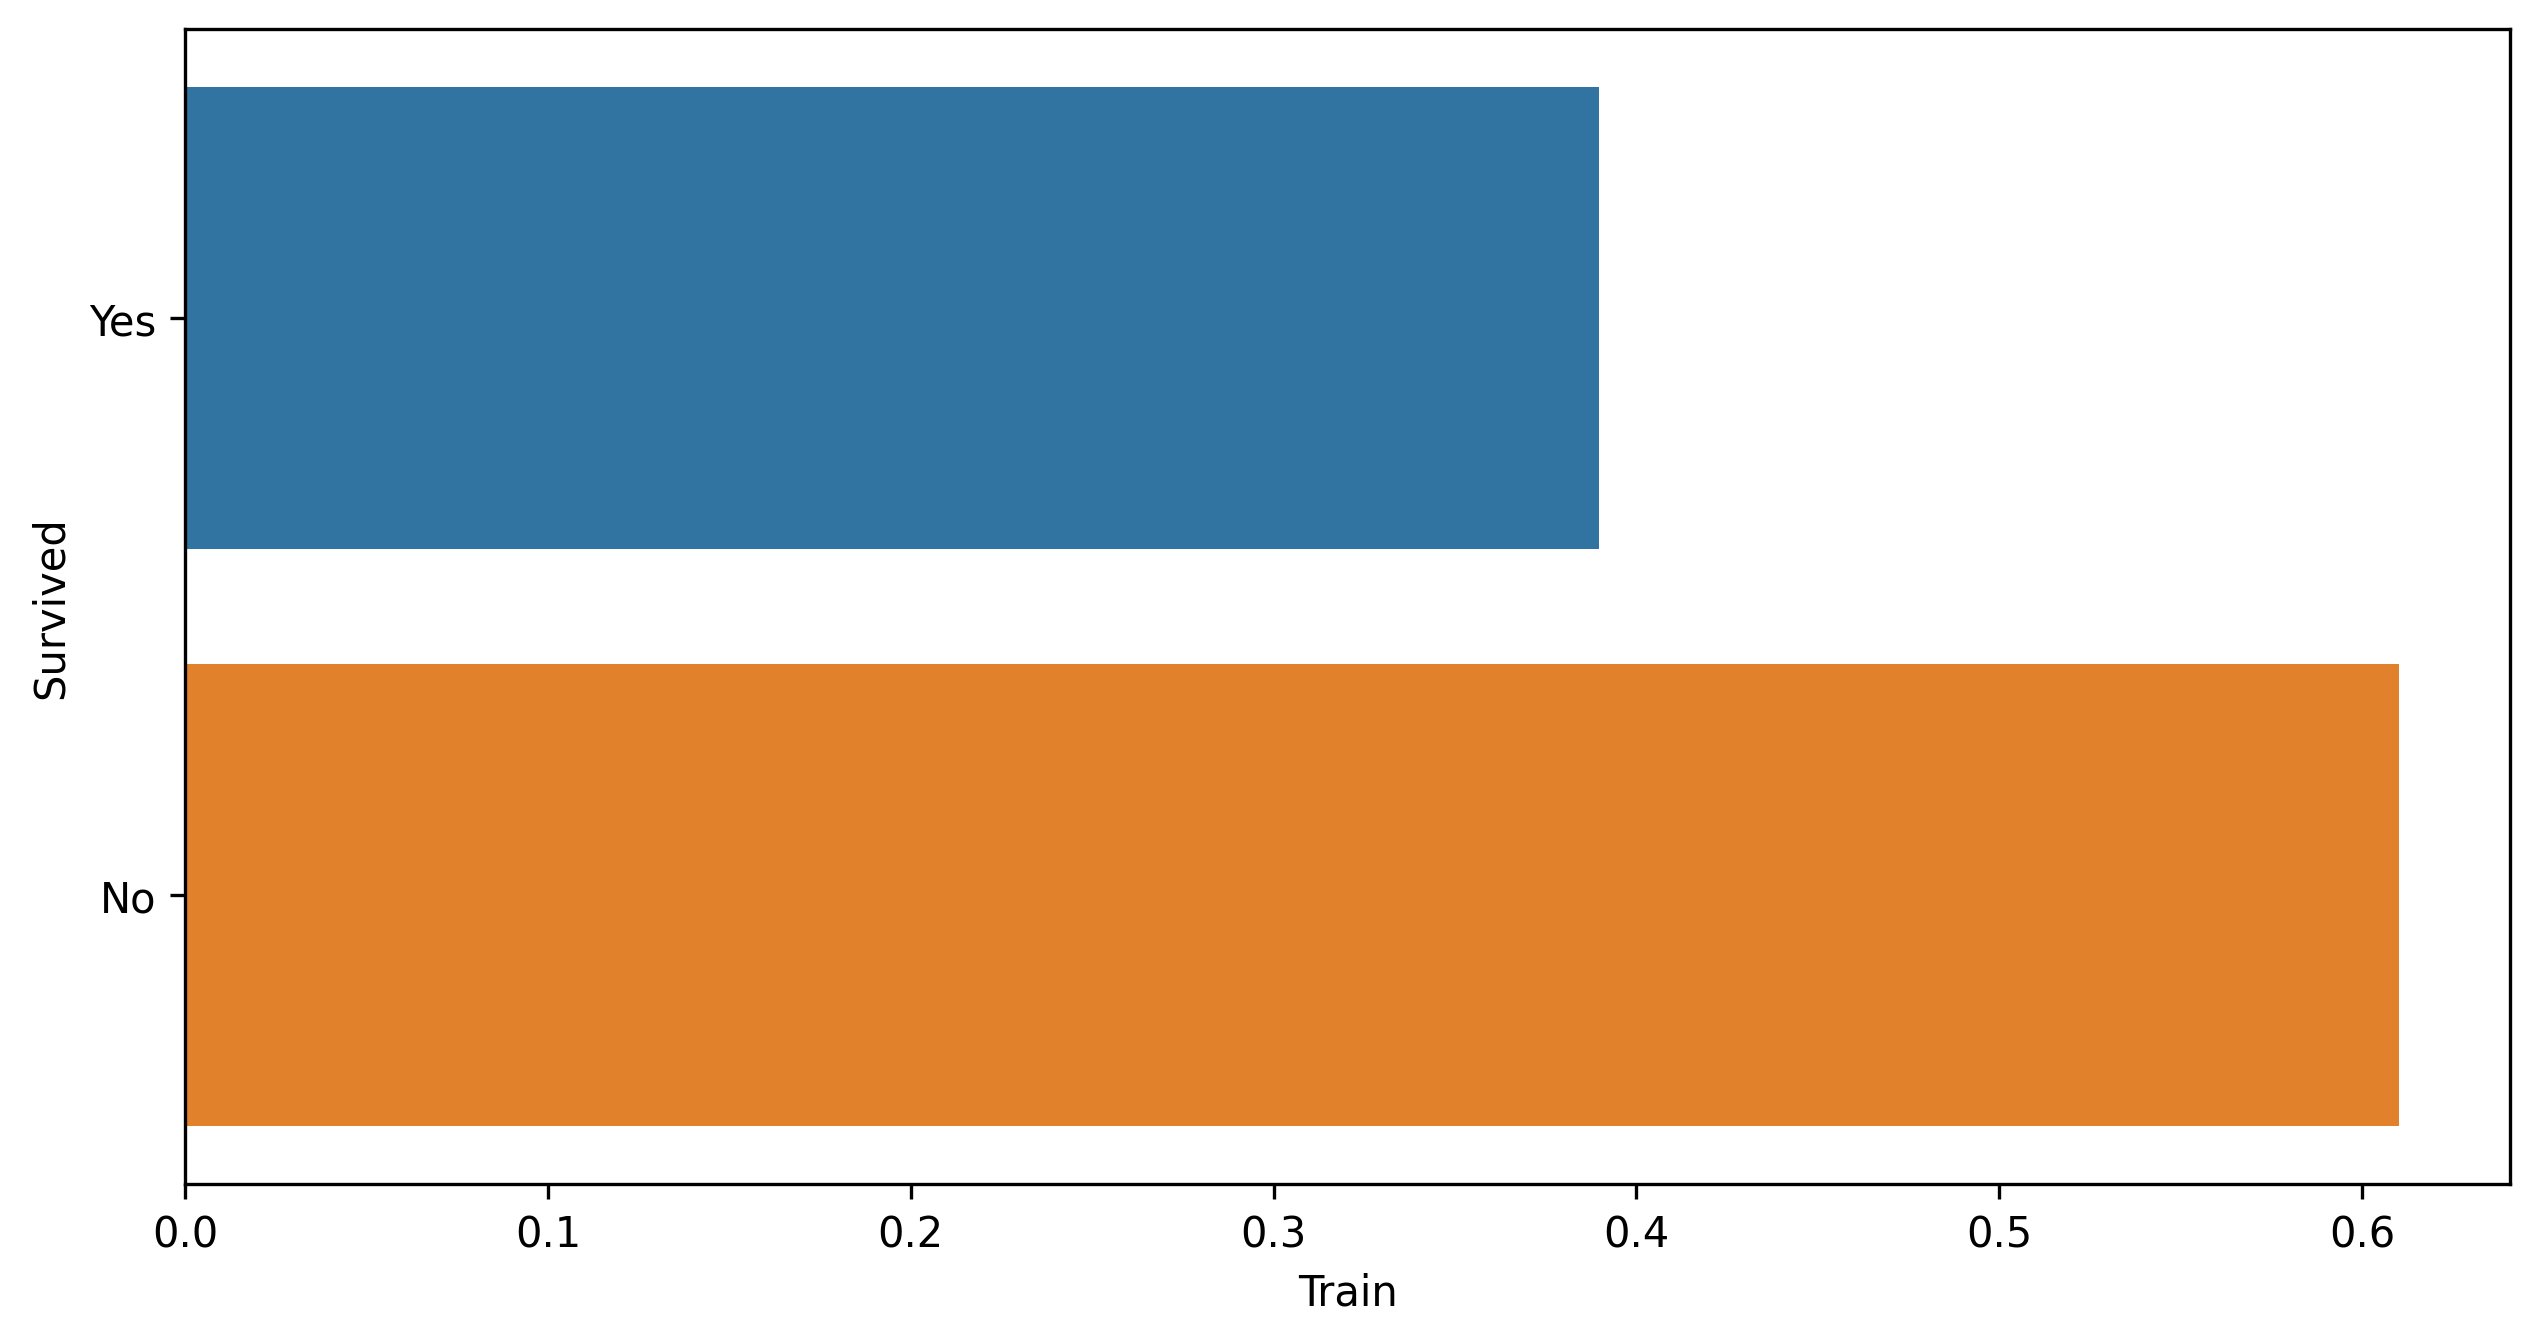

In [47]:
sns.barplot(data=Count, x="Train", y="Survived");

## Part 5: Classification

Now that we've split our data into a training set and a test set, we are reading to perform K-nearest-neighbors classification! We will be using the attributes of each passenger that we have in our dataset, such as their age, to classify passengers as dead or alive. In the end, we will use the testing set to test how accurate our model is at predicting whether a passenger survives or not.

**Question 33:** Remember, we need to pick k to be an odd number, why is that?

**Answer Here:**


### Visualization of KNN

**Question 34:** Below we have a scatter plot between math scores and reading scores for the first 100 rows. The points have been color coded with their respective parent educations.

**For the red dot below, with a k value of 3, would we say that this individual as survived or dead?**

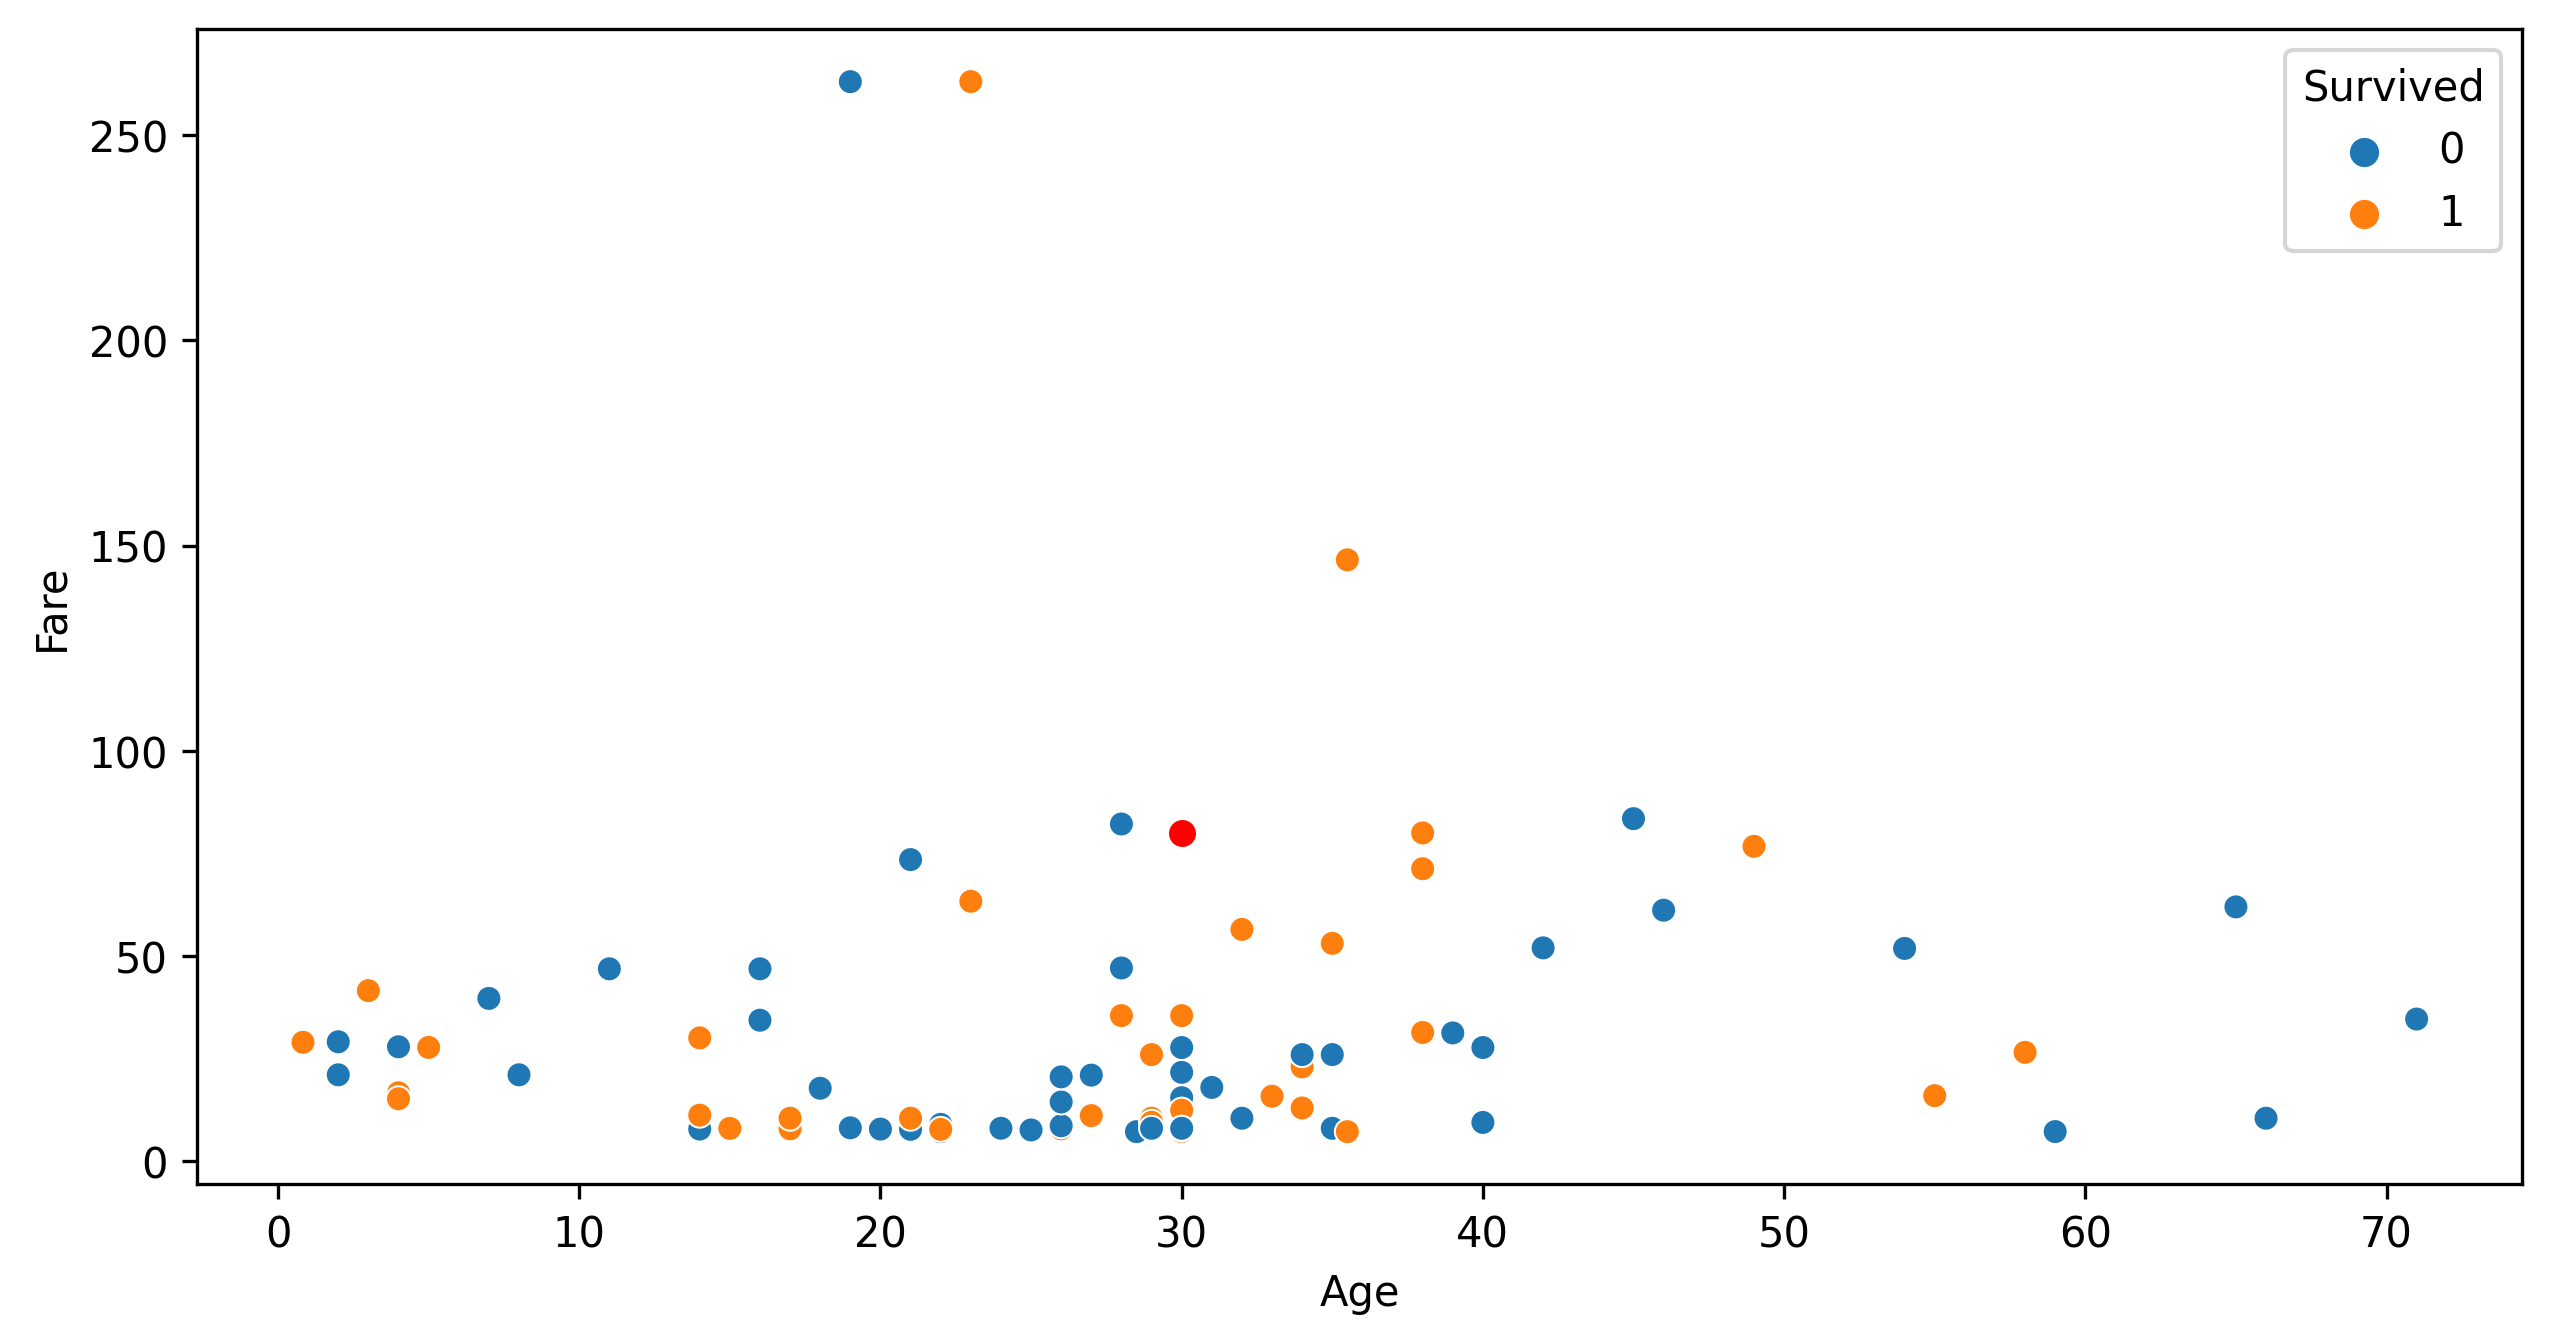

In [48]:
# Don't Touch this! Just run it!
train_titanic_less = train_titanic.take(np.arange(0,100))
sns.scatterplot(data = train_titanic_less, x = 'Age', y = 'Fare', hue = 'Survived')
plt.scatter(30, 80, color='red', s=30);

**Answer Key:**

We can see that there is one blue point nearest to the red point, and two yellow points to the right of the red point. Be careful when finding the three closest points because the scales for age and fare are very different. When implementing k-nearest-neighbors in code, we will not have this issue. We would classify the red point as survived in this case.

**Question 35:** Create a function `standard_units()` that given an array, it returns standard units of each item in the array. In order to find standard units, you must subtract the mean of the array from each item in the array and then divide this by the standard deviation of the array.

We want to convert to standard units so that we can compare all of the different features, which are currently in different units (ie. age vs class). By putting them in standard units, we can easily compute distances later.

In [49]:
def standard_units(arr):
    return (arr - np.mean(arr)) / np.std(arr)

Here, we convert gender to 0 and 1's like we did earlier in the project. Don't worry about the function, just run it.

In [50]:
def gender_convert(x):
    if x == 'male':
        return 1
    else:
        return 0

**Question 36:** Now we need to make sure that each column of our dataset is standardized using the `standard_units()` function we just created. Create a function when given a unstandardized dataset, will return a standardized dataset.

In [51]:
# Dataset is either training or testing dataset with the same column names as original
def pipeline(dataset):

    age_su = standard_units(dataset['Age'])
    fare_su = standard_units(dataset['Fare'])
    class_su = standard_units(dataset['Class'])
    family_size_su = standard_units(dataset['Family_Size'])

    gender_converted = dataset['Sex'].apply(gender_convert)
    gender_converted_su = standard_units(gender_converted)

    table = pd.DataFrame({
        'Age': age_su,
        'Fare': fare_su,
        'Class': class_su,
        'Family Size': family_size_su,
        'Sex': gender_converted_su,
        'Survived': dataset['Survived']
    })

    return table

train = pipeline(train_titanic)
train.head()

,Age,Fare,Class,Family Size,Sex,Survived
1,-0.569921,-0.499902,0.839484,0.065472,0.740309,0
2,0.636578,0.728415,-1.554073,0.065472,-1.350787,1
3,-0.268297,-0.486954,0.839484,-0.578192,-1.350787,1
4,0.410359,0.379614,-1.554073,0.065472,-1.350787,1
5,0.410359,-0.484556,0.839484,-0.578192,0.740309,0


In [52]:
test = pipeline(test_titanic)
test.head()

,Age,Fare,Class,Family Size,Sex,Survived
761,-0.826128,-0.456448,-0.438743,-0.491962,0.722999,0
762,0.396878,-0.565387,0.761086,-0.491962,0.722999,0
763,0.320440,1.911791,-1.638572,-0.491962,-1.383128,1
764,0.091126,-0.361718,0.761086,-0.491962,0.722999,0
765,0.931943,-0.594595,0.761086,-0.491962,0.722999,0


**Question 37:** Now create a function `distances()` that will return a table that use the distance formula to calculate the all  each point in the training set and the new point from the test set.

In [53]:
# Goes through and collects all the distances for 1 row of testing data

def distances(train, test_row):
    distances = np.array([])
    for row in np.arange(train.shape[0]):
        squares = np.array([])
        for column in np.arange(test.shape[1]):
            squares = np.append(squares, (train.iloc[row].iloc[column] - test_row.iloc[column]) ** 2)
        distances = np.append(distances, np.sum(squares)**1/2)

    return pd.DataFrame({
        'Distances': distances,
        'Train Survived': train['Survived']
    })

distance_table = distances(train, test.iloc[0])
distance_table

,Distances,Train Survived
1,1.006214,0
2,5.199345,1
3,3.626998,1
4,4.541591,1
5,1.585645,0
...,...,...
756,1.410145,0
757,0.876266,0
758,7.378615,1
759,2.143589,1


**Question 38:** Now create a function `k_min()`that will take in the distance table from the function we just made, and find the k-nearest values. Then it should return whether or not this point should be classified as survived or not survived based on the k-nearest values.

In [54]:
# Classifies a single row
def k_min(table, k):
    mins = table.sort_values(by = 'Distances', ascending = True).iloc[0:k]
    grouped = mins.groupby('Train Survived').count().sort_values(by = 'Distances', ascending = False)
    return grouped.index[0]


k_min(distances(train,test.iloc[20]), 5)
#0 is classified as died

1

**Question 39:** Let's put everything together! Create a function/classifier `KNN_classifier` that takes in a standardized training and test set, k value and associated testing labels (aka an array that shows whether each person in the testing dataset survived).

Hint: this classifier should use your `distances()` and `k_min()` functions.

This cell might take a while to run!

In [55]:
def KNN_classifer(train, test_data, k, test_labels):
    predictions = np.array([])
    for row in np.arange(test_data.shape[0]):
        dist_tbl = distances(train, test_data.iloc[row])
        predicted =  k_min(dist_tbl, k)
        predictions = np.append(predictions, predicted)

    return sum(predictions == test_data['Survived'])/test_data.shape[0]

# Replace the elipses with an integer value that will be the size of your k. This cell will output a proportion
# which is the accuracy of your classifier!
#This example uses the first 50 points in the train set so it runs faster but remove it if you want to wait
KNN_classifer(train.iloc[:50], test, 7, "Train Survived")

0.8656716417910447

## Congratulations!!! You have successfully created your very own machine learning model!

Give yourself a pat on your back! Not only did you create your own machine learning model, but you also cleaned your datasets, performed EDA, and even conducted your own A/B Test.

### Extra:

K-NN is one type of classification model. There are many different types of models and tools that you can use for your prediction tasks–such as Decision Trees, Logistic Regression, or Random Forests. These are all valid models and have their own strengths and weaknesses.

If you would like, you can read documentation on these models and classify students using them instead of a K-NN!


### Parting Thoughts from your instructors at BDAB!

It was great having you guys be a part of our family at BDAB! We really enjoyed working with you guys and teaching you cool and interesting Data Science concepts! We hope you use the tools and skills you used in your future endeavors!

Feel free reach out with us and share anything interesting you do with Python and NumPy! Our contact information is included below:

* Rishi: rishiraij@berkeley.edu
* Ryan: ryanshah@berkeley.edu
* Kyra: kyrawong@berkeley.edu
* Nishka: nishkachotai@berkeley.edu
* Mark: ricky0613@berkeley.edu

### Thank you!